In [1]:
import os
import json
import pandas as pd
from scipy.io import savemat

# Path to your folder (update this to your actual path)
folder_path = r'D:\03_06_2025\data\bang_bang\control_actions'

dataframes = []

for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            try:
                data = json.load(file)

                # Add a source column to track which file it came from
                data['source_file'] = filename

                # If it's a flat dictionary, convert to 1-row DataFrame
                df = pd.json_normalize(data)
                dataframes.append(df)

            except json.JSONDecodeError:
                print(f"Error decoding {filename}")

# Concatenate all DataFrames
combined_df = pd.concat(dataframes, ignore_index=True)

# Save as .mat file
savemat('control_actions_data.mat', {'control_actions': combined_df.to_dict("list")})


In [2]:
combined_df['energy_data.timestamp'].values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, '2025-04-07T16:48:08.260609',
       '2025-04-07T16:53:10.147919', '2025-04-07T16:58:12.529669',
       '2025-04-07T17:03:14.955998', '2025-04-07T17:08:17.332442',
       '2025-04-07T17:13:19.737842', '2025-04-07T17:18:21.640694',
       '2025-04-07T17:23:23.596839', '2025-04-07T17:28:36.322867',
       '2025-04-07T17:33:38.707776', '2025-04-07T17:38:51.365188',
       '2025-04-07T17:43:53.870972', '2025-04-07T17:48:55.764833',
       '2025-04-07T17:53:57.914723', '2025-04-07T17:59:00.194299',
       '2025-04-07T18:04:12.969906', '2025-04-07T18:09:15.369658',
       '2025-04-07T18:14:17.761832', '2025-04-07T18:19:30.022958',
       '2025-04-07T18:24:32.444286', '2025-04-0

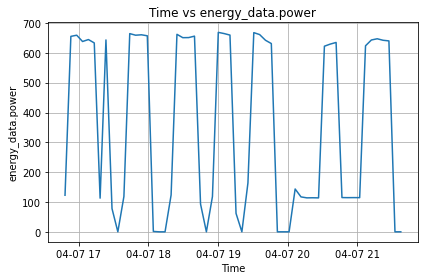

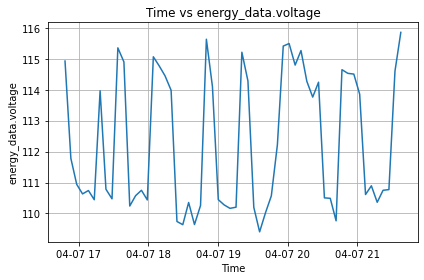

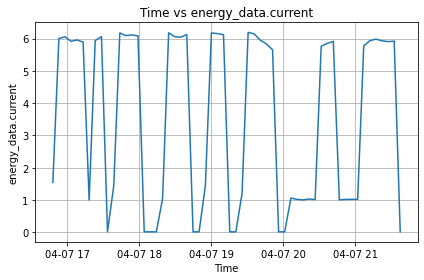

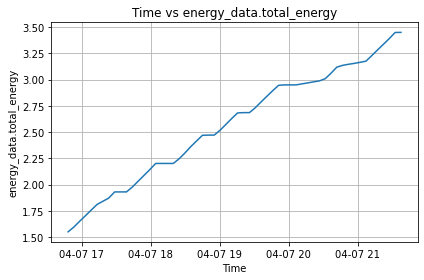

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'timestamp' to datetime (if not already)
import pandas as pd

combined_df['timestamp'] = pd.to_datetime(
    combined_df['timestamp'], 
    format='%Y-%m-%d_%H-%M-%S'
)

# Set it as the index (optional but cleaner)
combined_df.set_index('timestamp', inplace=True)

# Columns to plot (excluding non-numeric or complex structures like lists/dicts)
plot_columns = [
    'energy_data.power',
    'energy_data.voltage',
    'energy_data.current',
    'energy_data.total_energy'
]

# Plot each column
for col in plot_columns:
    plt.figure()
    plt.plot(combined_df.index, combined_df[col])
    plt.title(f'Time vs {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [6]:
import os
import json
import pandas as pd
from scipy.io import savemat

# Path to your folder (update this to your actual path)
folder_path = r'D:\03_06_2025\data\bang_bang\control_actions'

dataframes = []

for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            try:
                data = json.load(file)

                # Add a source column to track which file it came from
                data['source_file'] = filename

                # If it's a flat dictionary, convert to 1-row DataFrame
                df = pd.json_normalize(data)
                dataframes.append(df)

            except json.JSONDecodeError:
                print(f"Error decoding {filename}")

# Concatenate all DataFrames
combined_df = pd.concat(dataframes, ignore_index=True)

# Save as .mat file
savemat('control_actions_data.mat', {'control_actions': combined_df.to_dict("list")})


In [7]:
# Make sure timestamp column is in datetime and sorted
combined_df = combined_df.sort_index()

# Define start and end time of the bang-bang experiment
start_time = pd.to_datetime('2025-04-07_17-43-53', format='%Y-%m-%d_%H-%M-%S')
end_time = pd.to_datetime('2025-04-07_21-39-01', format='%Y-%m-%d_%H-%M-%S')

# Slice the dataframe between start and end time
experiment_df = combined_df.loc[start_time:end_time]

# Calculate energy used during this period
energy_start = experiment_df['energy_data.total_energy'].iloc[0]
energy_end = experiment_df['energy_data.total_energy'].iloc[-1]
bang_bang_energy_used = energy_end - energy_start

print(f"Calculated Energy Usage: {bang_bang_energy_used:.4f} kWh")


TypeError: '<' not supported between instances of 'int' and 'Timestamp'

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to datetime
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'], format='%Y-%m-%d_%H-%M-%S')
combined_df.set_index('timestamp', inplace=True)
combined_df.sort_index(inplace=True)

# Define Bang-Bang control period
start_time = pd.to_datetime("2025-04-07_16-48-08", format='%Y-%m-%d_%H-%M-%S')
end_time = pd.to_datetime("2025-04-07_21-39-01", format='%Y-%m-%d_%H-%M-%S')

# Slice data for the Bang-Bang experiment
bang_bang_df = combined_df.loc[start_time:end_time].copy()

# Normalize energy data to start from 0 (relative energy usage)
bang_bang_df['energy_data.total_energy_normalized'] = bang_bang_df['energy_data.total_energy'] - bang_bang_df['energy_data.total_energy'].iloc[0]



# Plot normalized energy usage
plt.figure()
plt.plot(bang_bang_df.index, bang_bang_df['energy_data.total_energy_scaled'])
plt.title('Bang-Bang Control: Time vs Energy Usage')
plt.xlabel('Time')
plt.ylabel('Energy Usage (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: 'energy_data.total_energy_scaled'

<Figure size 432x288 with 0 Axes>

In [9]:
print(combined_df.columns)


Index(['action', 'success', 'source_file', 'zone_states', 'damper_states',
       'damper_positions', 'energy_data.timestamp', 'energy_data.ac_status',
       'energy_data.power', 'energy_data.voltage', 'energy_data.current',
       'energy_data.total_energy', 'energy_data.raw_emeter_data'],
      dtype='object')


In [10]:
combined_df['timestamp'] = pd.to_datetime(combined_df['energy_data.timestamp'])


In [11]:
combined_df.set_index('timestamp', inplace=True)
combined_df.sort_index(inplace=True)


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract correct timestamp column (based on JSON structure)
combined_df['timestamp'] = pd.to_datetime(combined_df['energy_data.timestamp'])

# Set timestamp as index
combined_df.set_index('timestamp', inplace=True)
combined_df.sort_index(inplace=True)

# Define start and end time of Bang-Bang
start_time = pd.to_datetime("2025-04-07_16-48-08", format='%Y-%m-%d_%H-%M-%S')
end_time = pd.to_datetime("2025-04-07_21-39-01", format='%Y-%m-%d_%H-%M-%S')

# Slice for Bang-Bang period
bang_bang_df = combined_df.loc[start_time:end_time].copy()

# Normalize energy
bang_bang_df['energy_data.total_energy_normalized'] = (
    bang_bang_df['energy_data.total_energy'] - bang_bang_df['energy_data.total_energy'].iloc[0]
)

# Scale to match reported energy
reported_total_energy = 1.7400
bang_bang_df['energy_data.total_energy_scaled'] = (
    bang_bang_df['energy_data.total_energy_normalized'] *
    (reported_total_energy / bang_bang_df['energy_data.total_energy_normalized'].iloc[-1])
)

# Plot
plt.figure()
plt.plot(bang_bang_df.index, bang_bang_df['energy_data.total_energy_scaled'])
plt.title('Bang-Bang Control: Time vs Energy Usage')
plt.xlabel('Time')
plt.ylabel('Energy Usage (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: Timestamp('2025-04-07 16:48:08')

C:\Users\jmarti423\AppData\Local\Temp\ipykernel_25216\1456976231.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['timestamp'] = pd.to_datetime(combined_df['energy_data.timestamp'])


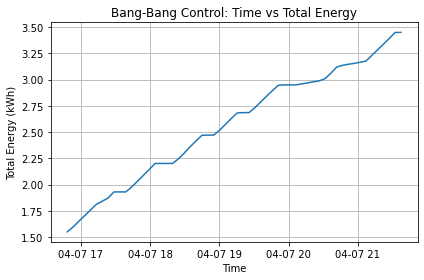

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Parse timestamp from 'energy_data.timestamp' (skip rows with NaN)
combined_df = combined_df.dropna(subset=['energy_data.timestamp'])
combined_df['timestamp'] = pd.to_datetime(combined_df['energy_data.timestamp'])
combined_df.set_index('timestamp', inplace=True)
combined_df.sort_index(inplace=True)

# Define start and end time
start_time = pd.to_datetime("2025-04-07T16:48:08")
end_time = pd.to_datetime("2025-04-07T21:39:01")

# Slice data
bang_bang_df = combined_df.loc[start_time:end_time]

# Plot raw total energy
plt.figure()
plt.plot(bang_bang_df.index, bang_bang_df['energy_data.total_energy'])
plt.title('Bang-Bang Control: Time vs Total Energy')
plt.xlabel('Time')
plt.ylabel('Total Energy (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
print(combined_df.index.min())
print(combined_df.index.max())


2025-04-07 16:48:08.260609
2025-04-07 21:37:20.791393


In [15]:
# Load all files again
dataframes = []

for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            try:
                data = json.load(file)
                data['source_file'] = filename
                df = pd.json_normalize(data)
                dataframes.append(df)
            except json.JSONDecodeError:
                print(f"Error decoding {filename}")

# Combine
combined_df = pd.concat(dataframes, ignore_index=True)

# Check which ones are missing timestamps
missing_ts = combined_df[combined_df['energy_data.timestamp'].isna()]
print(missing_ts['source_file'].unique())


['ac_2025-04-07_16-48-02.json' 'ac_2025-04-07_17-28-30.json'
 'ac_2025-04-07_17-38-45.json' 'ac_2025-04-07_18-04-07.json'
 'ac_2025-04-07_18-19-24.json' 'ac_2025-04-07_18-44-45.json'
 'ac_2025-04-07_18-55-01.json' 'ac_2025-04-07_19-15-19.json'
 'ac_2025-04-07_19-25-35.json' 'ac_2025-04-07_19-50-57.json'
 'ac_2025-04-07_20-06-14.json' 'ac_2025-04-07_21-32-12.json'
 'dampers_2025-04-07_16-47-55.json' 'dampers_2025-04-07_16-58-11.json'
 'dampers_2025-04-07_17-03-13.json' 'dampers_2025-04-07_17-08-15.json'
 'dampers_2025-04-07_17-13-18.json' 'dampers_2025-04-07_17-28-24.json'
 'dampers_2025-04-07_17-33-37.json' 'dampers_2025-04-07_17-38-39.json'
 'dampers_2025-04-07_17-43-52.json' 'dampers_2025-04-07_17-58-58.json'
 'dampers_2025-04-07_18-04-01.json' 'dampers_2025-04-07_18-09-13.json'
 'dampers_2025-04-07_18-14-16.json' 'dampers_2025-04-07_18-24-30.json'
 'dampers_2025-04-07_18-39-37.json' 'dampers_2025-04-07_18-44-39.json'
 'dampers_2025-04-07_18-49-52.json' 'dampers_2025-04-07_18-54-54.j

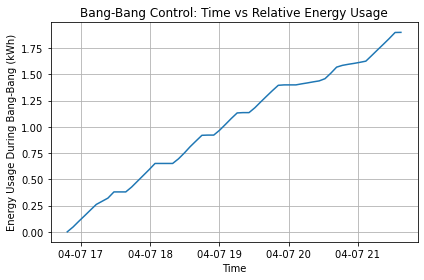

In [16]:
# Relative energy usage during Bang-Bang
bang_bang_df['total_energy_relative'] = (
    bang_bang_df['energy_data.total_energy'] - bang_bang_df['energy_data.total_energy'].iloc[0]
)

# Plot
plt.figure()
plt.plot(bang_bang_df.index, bang_bang_df['total_energy_relative'])
plt.title('Bang-Bang Control: Time vs Relative Energy Usage')
plt.xlabel('Time')
plt.ylabel('Energy Usage During Bang-Bang (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
bang_bang_df['energy_data.total_energy'].max

<bound method Series.max of timestamp
2025-04-07 16:48:08.260609    1.551
2025-04-07 16:53:10.147919    1.597
2025-04-07 16:58:12.529669    1.652
2025-04-07 17:03:14.955998    1.705
2025-04-07 17:08:17.332442    1.759
2025-04-07 17:13:19.737842    1.812
2025-04-07 17:18:21.640694    1.842
2025-04-07 17:23:23.596839    1.872
2025-04-07 17:28:36.322867    1.931
2025-04-07 17:33:38.707776    1.931
2025-04-07 17:38:51.365188    1.931
2025-04-07 17:43:53.870972    1.977
2025-04-07 17:48:55.764833    2.032
2025-04-07 17:53:57.914723    2.087
2025-04-07 17:59:00.194299    2.142
2025-04-07 18:04:12.969906    2.202
2025-04-07 18:09:15.369658    2.202
2025-04-07 18:14:17.761832    2.202
2025-04-07 18:19:30.022958    2.202
2025-04-07 18:24:32.444286    2.246
2025-04-07 18:29:34.342940    2.301
2025-04-07 18:34:36.240430    2.361
2025-04-07 18:39:38.663193    2.415
2025-04-07 18:44:51.350018    2.470
2025-04-07 18:49:53.724789    2.472
2025-04-07 18:55:06.458286    2.472
2025-04-07 19:00:08.863555

In [18]:
bang_bang_df['total_energy_relative'].max

<bound method Series.max of timestamp
2025-04-07 16:48:08.260609    0.000
2025-04-07 16:53:10.147919    0.046
2025-04-07 16:58:12.529669    0.101
2025-04-07 17:03:14.955998    0.154
2025-04-07 17:08:17.332442    0.208
2025-04-07 17:13:19.737842    0.261
2025-04-07 17:18:21.640694    0.291
2025-04-07 17:23:23.596839    0.321
2025-04-07 17:28:36.322867    0.380
2025-04-07 17:33:38.707776    0.380
2025-04-07 17:38:51.365188    0.380
2025-04-07 17:43:53.870972    0.426
2025-04-07 17:48:55.764833    0.481
2025-04-07 17:53:57.914723    0.536
2025-04-07 17:59:00.194299    0.591
2025-04-07 18:04:12.969906    0.651
2025-04-07 18:09:15.369658    0.651
2025-04-07 18:14:17.761832    0.651
2025-04-07 18:19:30.022958    0.651
2025-04-07 18:24:32.444286    0.695
2025-04-07 18:29:34.342940    0.750
2025-04-07 18:34:36.240430    0.810
2025-04-07 18:39:38.663193    0.864
2025-04-07 18:44:51.350018    0.919
2025-04-07 18:49:53.724789    0.921
2025-04-07 18:55:06.458286    0.921
2025-04-07 19:00:08.863555

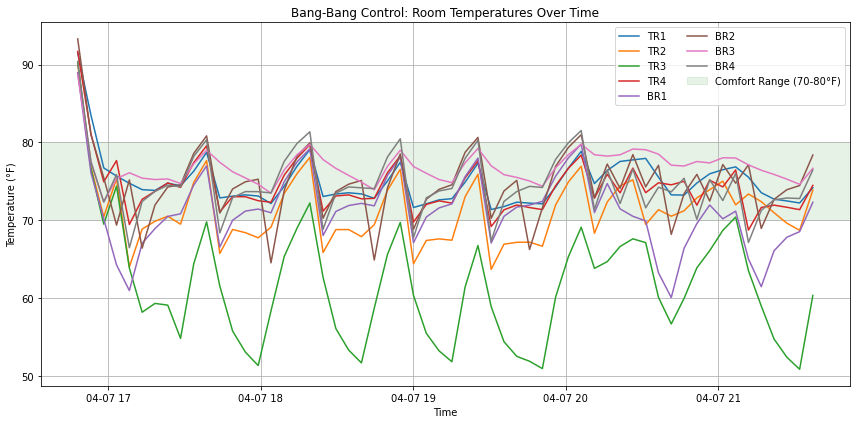

In [19]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# Folder with bang-bang temperature logs
temp_folder = r"D:\03_06_2025\data\bang_bang\temperatures"

# List to hold each parsed row
records = []

for filename in os.listdir(temp_folder):
    if filename.endswith('.json'):
        file_path = os.path.join(temp_folder, filename)
        with open(file_path, 'r') as file:
            try:
                data = json.load(file)
                if 'timestamp' in data and 'temperatures' in data:
                    row = data['temperatures']
                    row['timestamp'] = data['timestamp']
                    records.append(row)
            except json.JSONDecodeError:
                print(f"Error decoding {filename}")

# Convert to DataFrame
temp_df = pd.DataFrame(records)

# Parse timestamp
temp_df['timestamp'] = pd.to_datetime(temp_df['timestamp'], format='%Y-%m-%d_%H-%M-%S')
temp_df.set_index('timestamp', inplace=True)
temp_df.sort_index(inplace=True)

# Plot room temperatures (excluding Ambient)
plt.figure(figsize=(12, 6))
for col in [c for c in temp_df.columns if c != 'Ambient']:
    plt.plot(temp_df.index, temp_df[col], label=col)

# Comfort range shading
plt.axhspan(70, 80, color='green', alpha=0.1, label='Comfort Range (70-80°F)')

plt.title("Bang-Bang Control: Room Temperatures Over Time")
plt.xlabel("Time")
plt.ylabel("Temperature (°F)")
plt.legend(loc="upper right", ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# Path to AC control actions
ac_folder = r"D:\03_06_2025\data\bang_bang\control_actions"

ac_records = []

for filename in os.listdir(ac_folder):
    if filename.startswith("ac_") and filename.endswith(".json"):
        with open(os.path.join(ac_folder, filename), 'r') as file:
            data = json.load(file)
            if data['success']:
                ac_records.append({
                    "timestamp": pd.to_datetime(data['timestamp'], format='%Y-%m-%d_%H-%M-%S'),
                    "status": 1 if data['action'] == 'on' else 0
                })

# Convert to DataFrame
ac_df = pd.DataFrame(ac_records).sort_values("timestamp").set_index("timestamp")

# Forward-fill status for continuous plot
ac_df = ac_df.resample("1T").ffill()

# Plot AC status
plt.figure(figsize=(10, 3))
plt.plot(ac_df.index, ac_df['status'], drawstyle='steps-post', label='AC Status')
plt.title("AC Status Over Time (1=ON, 0=OFF)")
plt.xlabel("Time")
plt.ylabel("AC Status")
plt.yticks([0, 1], ['OFF', 'ON'])
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Path to damper logs
damper_folder = r"D:\03_06_2025\data\bang_bang\control_actions"

damper_records = []

for filename in os.listdir(damper_folder):
    if filename.startswith("dampers_") and filename.endswith(".json"):
        with open(os.path.join(damper_folder, filename), 'r') as file:
            data = json.load(file)
            if data['success']:
                row = {"timestamp": pd.to_datetime(data['timestamp'], format='%Y-%m-%d_%H-%M-%S')}
                for i in range(8):
                    row[f"Damper_{i+1}"] = data['damper_states'][i]
                damper_records.append(row)

# Create DataFrame
damper_df = pd.DataFrame(damper_records).sort_values("timestamp").set_index("timestamp")

# Resample to fill in the gaps
damper_df = damper_df.resample("1T").ffill()

# Plot
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.plot(damper_df.index, damper_df[f"Damper_{i+1}"] + i * 2, label=f"Room {i+1}")

plt.title("Damper Open/Closed States Over Time")
plt.xlabel("Time")
plt.yticks(
    [i * 2 for i in range(8)],
    [f"Room {i+1}" for i in range(8)]
)
plt.grid(True)
plt.legend(ncol=4)
plt.tight_layout()
plt.show()


In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# Path to filtered Kalman-estimated temperature JSONs
filtered_folder = r"D:\03_06_2025\data\temperatures"
filtered_files = [f for f in os.listdir(filtered_folder) if f.startswith('filtered_temps_') and f.endswith('.json')]

filtered_data = []

for filename in filtered_files:
    file_path = os.path.join(filtered_folder, filename)
    with open(file_path, 'r') as file:
        data = json.load(file)
        if 'temperatures' in data:
            row = data['temperatures']
            row['timestamp'] = data['timestamp']
            filtered_data.append(row)

filtered_df = pd.DataFrame(filtered_data)
filtered_df['timestamp'] = pd.to_datetime(filtered_df['timestamp'], format='%Y-%m-%d_%H-%M-%S')
filtered_df = filtered_df[filtered_df['timestamp'].dt.date == pd.to_datetime('2025-04-07').date()]
filtered_df.set_index('timestamp', inplace=True)
filtered_df.sort_index(inplace=True)

# Plot Kalman estimates
plt.figure(figsize=(12, 6))
for col in [c for c in filtered_df.columns if c != 'Ambient']:
    plt.plot(filtered_df.index, filtered_df[col], label=col)

plt.axhspan(70, 80, color='green', alpha=0.1, label='Comfort Range (70–80°F)')
plt.title("MPC: Kalman Filtered Room Temperatures (2025-04-07)")
plt.xlabel("Time")
plt.ylabel("Temperature (°F)")
plt.grid(True)
plt.legend(loc="upper right", ncol=2)
plt.tight_layout()
plt.show()


In [ ]:
# Path to raw temps JSONs
raw_files = [f for f in os.listdir(filtered_folder) if f.startswith('temps_2025-04-07') and f.endswith('.json')]

raw_data = []

for filename in raw_files:
    file_path = os.path.join(filtered_folder, filename)
    with open(file_path, 'r') as file:
        data = json.load(file)
        if 'temperatures' in data:
            row = data['temperatures']
            row['timestamp'] = data['timestamp']
            raw_data.append(row)

raw_df = pd.DataFrame(raw_data)
raw_df['timestamp'] = pd.to_datetime(raw_df['timestamp'], format='%Y-%m-%d_%H-%M-%S')
raw_df.set_index('timestamp', inplace=True)
raw_df.sort_index(inplace=True)

# Plot raw readings
plt.figure(figsize=(12, 6))
for col in [c for c in raw_df.columns if c != 'Ambient']:
    plt.plot(raw_df.index, raw_df[col], label=col)

plt.axhspan(70, 80, color='green', alpha=0.1, label='Comfort Range (70–80°F)')
plt.title("MPC: Raw Room Temperatures (2025-04-07)")
plt.xlabel("Time")
plt.ylabel("Temperature (°F)")
plt.grid(True)
plt.legend(loc="upper right", ncol=2)
plt.tight_layout()
plt.show()


In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

energy_folder = r"D:\03_06_2025\data\control_actions"
energy_data = []

for filename in os.listdir(energy_folder):
    if filename.startswith("energy_2025-04-07") and filename.endswith(".json"):
        with open(os.path.join(energy_folder, filename), 'r') as file:
            data = json.load(file)
            edata = data.get('energy_data', {})
            if edata:
                energy_data.append({
                    "timestamp": pd.to_datetime(edata['timestamp']),
                    "total_energy": edata['total_energy']
                })

energy_df = pd.DataFrame(energy_data).sort_values("timestamp").set_index("timestamp")

# Plot total energy
plt.figure(figsize=(10, 4))
plt.plot(energy_df.index, energy_df['total_energy'])
plt.title("MPC: Total Energy Over Time (2025-04-07)")
plt.xlabel("Time")
plt.ylabel("Total Energy (kWh)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
mpc_folder = r"D:\03_06_2025\data\control_actions"
mpc_records = []

for filename in os.listdir(mpc_folder):
    if filename.startswith("mpc_2025-04-07") and filename.endswith(".json"):
        with open(os.path.join(mpc_folder, filename), 'r') as file:
            data = json.load(file)
            mpc_records.append({
                "timestamp": pd.to_datetime(data['timestamp']),
                "ac_on": data['ac_on']
            })

mpc_df = pd.DataFrame(mpc_records).sort_values("timestamp").set_index("timestamp")
mpc_df = mpc_df.resample("1T").ffill()

# Plot AC ON/OFF
plt.figure(figsize=(10, 3))
plt.plot(mpc_df.index, mpc_df['ac_on'], drawstyle='steps-post', label='AC ON')
plt.title("MPC: AC Control Decisions (2025-04-07)")
plt.xlabel("Time")
plt.ylabel("AC State")
plt.yticks([0, 1], ['OFF', 'ON'])
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
mpc_damper_data = []

for filename in os.listdir(mpc_folder):
    if filename.startswith("mpc_2025-04-07") and filename.endswith(".json"):
        with open(os.path.join(mpc_folder, filename), 'r') as file:
            data = json.load(file)
            row = {"timestamp": pd.to_datetime(data['timestamp'])}
            for i, state in enumerate(data["damper_states"]):
                row[f"Damper_{i+1}"] = state
            mpc_damper_data.append(row)

damper_df = pd.DataFrame(mpc_damper_data).sort_values("timestamp").set_index("timestamp")
damper_df = damper_df.resample("1T").ffill()

# Plot damper states
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.plot(damper_df.index, damper_df[f"Damper_{i+1}"] + i * 2, label=f"Room {i+1}")

plt.title("MPC: Damper States Over Time (2025-04-07)")
plt.xlabel("Time")
plt.yticks(
    [i * 2 for i in range(8)],
    [f"Room {i+1}" for i in range(8)]
)
plt.grid(True)
plt.legend(ncol=4)
plt.tight_layout()
plt.show()


In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

pred_folder = r"D:\03_06_2025\data\mpc_predictions"
pred_files = [f for f in os.listdir(pred_folder) if f.startswith("pred_2025-04-07")]

room_labels = [f"Room {i+1}" for i in range(8)]
trajectory_df = {room: [] for room in room_labels}
timestamps = []

for fname in sorted(pred_files):
    path = os.path.join(pred_folder, fname)
    with open(path, 'r') as f:
        data = json.load(f)
        ts = pd.to_datetime(data['timestamp'])
        pred = data['predicted_trajectories']
        for i, room_pred in enumerate(pred):
            trajectory_df[room_labels[i]].append(room_pred)
        timestamps.append(ts)

# Convert to DataFrame of 3D shape (rooms x predictions x time)
fig, axes = plt.subplots(4, 2, figsize=(14, 10), sharex=True)
axes = axes.flatten()

for i, room in enumerate(room_labels):
    ax = axes[i]
    for t_index, prediction in enumerate(trajectory_df[room]):
        ax.plot(range(len(prediction)), prediction, alpha=0.3)
    ax.set_title(f"{room}")
    ax.axhspan(70, 80, color='green', alpha=0.1)
    ax.set_ylabel("Temp (°F)")
    ax.set_ylim(65, 95)
    ax.grid(True)

plt.suptitle("MPC Predicted Temperature Trajectories (2025-04-07)")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [ ]:
ac_records = []

for fname in pred_files:
    path = os.path.join(pred_folder, fname)
    with open(path, 'r') as f:
        data = json.load(f)
        ac_records.append({
            "timestamp": pd.to_datetime(data['timestamp']),
            "ac_decision": data['ac_decision']
        })

ac_df = pd.DataFrame(ac_records).sort_values("timestamp").set_index("timestamp")
ac_df = ac_df.resample("1T").ffill()

plt.figure(figsize=(10, 3))
plt.plot(ac_df.index, ac_df['ac_decision'], drawstyle='steps-post')
plt.title("MPC Predicted AC Decisions (2025-04-07)")
plt.xlabel("Time")
plt.ylabel("AC State")
plt.yticks([0, 1], ['OFF', 'ON'])
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
damper_records = []

for fname in pred_files:
    path = os.path.join(pred_folder, fname)
    with open(path, 'r') as f:
        data = json.load(f)
        row = {"timestamp": pd.to_datetime(data['timestamp'])}
        for i, state in enumerate(data['damper_decisions']):
            row[f"Damper_{i+1}"] = state
        damper_records.append(row)

damper_df = pd.DataFrame(damper_records).sort_values("timestamp").set_index("timestamp")
damper_df = damper_df.resample("1T").ffill()

plt.figure(figsize=(12, 6))
for i in range(8):
    plt.plot(damper_df.index, damper_df[f"Damper_{i+1}"] + i * 2, label=f"Room {i+1}")

plt.title("MPC Damper Decisions Over Time (2025-04-07)")
plt.xlabel("Time")
plt.yticks([i * 2 for i in range(8)], [f"Room {i+1}" for i in range(8)])
plt.grid(True)
plt.legend(ncol=4)
plt.tight_layout()
plt.show()


In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# Paths
pred_folder = r"D:\03_06_2025\data\mpc_predictions"
actual_temp_folder = r"D:\03_06_2025\data\temperatures"

# Load raw actual temps
actual_records = []

for fname in os.listdir(actual_temp_folder):
    if fname.startswith("temps_2025-04-07"):
        with open(os.path.join(actual_temp_folder, fname), 'r') as f:
            data = json.load(f)
            ts = pd.to_datetime(data['timestamp'], format="%Y-%m-%d_%H-%M-%S")
            temps = data['temperatures']
            temps['timestamp'] = ts
            actual_records.append(temps)

actual_df = pd.DataFrame(actual_records).set_index("timestamp").sort_index()

# Load predictions
selected_preds = []
for fname in sorted(os.listdir(pred_folder)):
    if fname.startswith("pred_2025-04-07") and "07:45" in fname:
        with open(os.path.join(pred_folder, fname), 'r') as f:
            data = json.load(f)
            ts = pd.to_datetime(data['timestamp'])
            selected_preds.append((ts, data))

# Plot comparison for each room
room_names = ["TR1", "TR2", "TR3", "TR4", "BR1", "BR2", "BR3", "BR4"]

for ts, pred_data in selected_preds:
    current_state = pred_data['current_state']
    predictions = pred_data['predicted_trajectories']

    future_times = [ts + pd.Timedelta(minutes=i) for i in range(len(predictions[0]))]
    actual_window = actual_df.loc[future_times].copy() if all(t in actual_df.index for t in future_times) else None

    fig, axes = plt.subplots(4, 2, figsize=(14, 10), sharex=True)
    axes = axes.flatten()

    for i, room in enumerate(room_names):
        ax = axes[i]

        # Plot current state as flat start
        ax.plot([ts], [current_state[i]], 'bo', label="Current State")

        # Plot prediction
        ax.plot(future_times, predictions[i], 'b--', label="Predicted Trajectory")

        # Plot actual if available
        if actual_window is not None:
            ax.plot(future_times, actual_window[room], 'r-', label="Actual Temp")

        ax.axhspan(70, 80, color='green', alpha=0.1)
        ax.set_title(room)
        ax.set_ylim(65, 95)
        ax.grid(True)

    fig.suptitle(f"MPC Prediction vs Actual: {ts.strftime('%Y-%m-%d %H:%M:%S')}")
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

energy_folder = r"D:\03_06_2025\data\control_actions"
energy_data = []

for filename in os.listdir(energy_folder):
    if filename.startswith("energy_2025-04-07") and filename.endswith(".json"):
        with open(os.path.join(energy_folder, filename), 'r') as file:
            data = json.load(file)
            edata = data.get('energy_data', {})
            if edata:
                energy_data.append({
                    "timestamp": pd.to_datetime(edata['timestamp']),
                    "total_energy": edata['total_energy']
                })

energy_df = pd.DataFrame(energy_data).sort_values("timestamp").set_index("timestamp")

# Plot total energy
plt.figure(figsize=(10, 4))
plt.plot(energy_df.index, energy_df['total_energy'])
plt.title("MPC: Total Energy Over Time (2025-04-07)")
plt.xlabel("Time")
plt.ylabel("Total Energy (kWh)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Relative energy usage during Bang-Bang
bang_bang_df['total_energy_relative'] = (
    bang_bang_df['energy_data.total_energy'] - bang_bang_df['energy_data.total_energy'].iloc[0]
)

# Plot
plt.figure()
plt.plot(bang_bang_df.index, bang_bang_df['total_energy_relative'])
plt.title('Bang-Bang Control: Time vs Relative Energy Usage')
plt.xlabel('Time')
plt.ylabel('Energy Usage During Bang-Bang (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
bang_bang_df['total_energy_relative']

In [ ]:
import matplotlib.pyplot as plt

# Normalize MPC energy for the first 4 hours
mpc_start_time = energy_df.index.min()
mpc_cutoff_time = mpc_start_time + pd.Timedelta(hours=4)
mpc_df_4hr = energy_df.loc[mpc_start_time:mpc_cutoff_time].copy()

mpc_df_4hr['total_energy_relative'] = (
    mpc_df_4hr['total_energy'] - mpc_df_4hr['total_energy'].iloc[0]
)

# Now plot both on the same graph
plt.figure(figsize=(10, 5))
plt.plot(bang_bang_df.index, bang_bang_df['total_energy_relative'], label="Bang-Bang Control")
plt.plot(mpc_df_4hr.index, mpc_df_4hr['total_energy_relative'], label="MPC Control (First 4 hrs)")
plt.title("Relative Energy Usage: Bang-Bang vs MPC (First 4 Hours)")
plt.xlabel("Time")
plt.ylabel("Relative Energy Usage (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


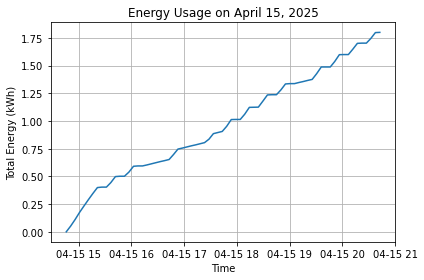

In [20]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import savemat

# Step 1: Define the path to the folder with JSON files
json_folder_path = r'D:\data_04_15_2025\data\bang_bang\control_actions'

# Step 2: Load and combine all JSON data into a single DataFrame
all_energy_data = []

for json_file in os.listdir(json_folder_path):
    if json_file.endswith('.json'):
        full_path = os.path.join(json_folder_path, json_file)
        with open(full_path, 'r') as file:
            try:
                json_data = json.load(file)
                json_data['source_file'] = json_file  # Track file origin
                df = pd.json_normalize(json_data)
                all_energy_data.append(df)
            except json.JSONDecodeError:
                print(f"Error decoding {json_file}")

# Combine all into one DataFrame
energy_df = pd.concat(all_energy_data, ignore_index=True)

# Step 3: Process timestamps
energy_df = energy_df.dropna(subset=['energy_data.timestamp'])  # Remove rows with missing timestamps
energy_df['timestamp'] = pd.to_datetime(energy_df['energy_data.timestamp'])  # Convert to datetime
energy_df.set_index('timestamp', inplace=True)
energy_df.sort_index(inplace=True)

# Step 4: Slice data for April 15, 2025
start_of_day = pd.to_datetime("2025-04-15 00:00:00")
end_of_day = pd.to_datetime("2025-04-15 23:59:59")
energy_april15 = energy_df.loc[start_of_day:end_of_day]

# Step 5: Plot total energy usage over time
plt.figure()
plt.plot(energy_april15.index, energy_april15['energy_data.total_energy'])
plt.title('Energy Usage on April 15, 2025')
plt.xlabel('Time')
plt.ylabel('Total Energy (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Save to .mat file for later use
savemat('energy_data_april15.mat', {'energy_data': energy_april15.to_dict("list")})


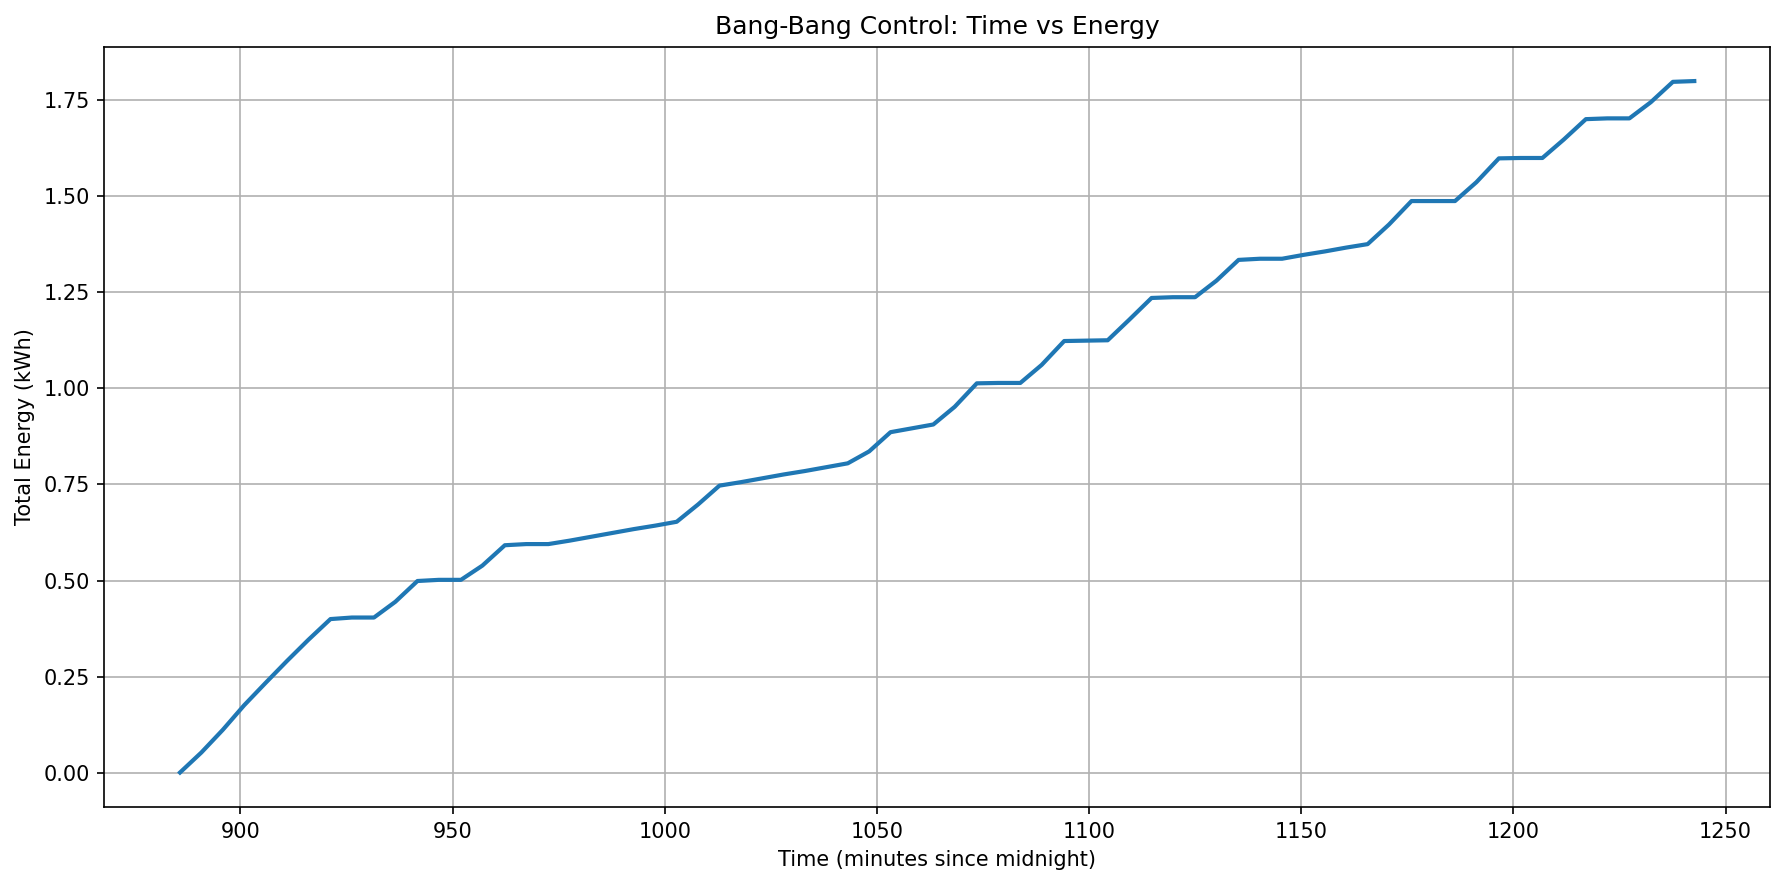

In [21]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import savemat

# Step 1: Define the path to the folder with JSON files
json_folder_path = r'D:\data_04_15_2025\data\bang_bang\control_actions'

# Step 2: Load and combine all JSON data into a single DataFrame
all_energy_data = []

for json_file in os.listdir(json_folder_path):
    if json_file.endswith('.json'):
        full_path = os.path.join(json_folder_path, json_file)
        with open(full_path, 'r') as file:
            try:
                json_data = json.load(file)
                json_data['source_file'] = json_file  # Track file origin
                df = pd.json_normalize(json_data)
                all_energy_data.append(df)
            except json.JSONDecodeError:
                print(f"Error decoding {json_file}")

# Combine all into one DataFrame
energy_df = pd.concat(all_energy_data, ignore_index=True)

# Step 3: Process timestamps
energy_df = energy_df.dropna(subset=['energy_data.timestamp'])  # Remove rows with missing timestamps
energy_df['timestamp'] = pd.to_datetime(energy_df['energy_data.timestamp'])  # Convert to datetime
energy_df.set_index('timestamp', inplace=True)
energy_df.sort_index(inplace=True)

# Step 4: Slice data for April 15, 2025
start_of_day = pd.to_datetime("2025-04-15 00:00:00")
end_of_day = pd.to_datetime("2025-04-15 23:59:59")
energy_april15 = energy_df.loc[start_of_day:end_of_day]

# Step 5: Convert timestamps to minutes since midnight
minutes_since_midnight = (energy_april15.index - start_of_day).total_seconds() / 60

# Step 6: Plot with high resolution and new labels
plt.figure(figsize=(12, 6), dpi=150)
plt.plot(minutes_since_midnight, energy_april15['energy_data.total_energy'], linewidth=2)
plt.title('Bang-Bang Control: Time vs Energy')
plt.xlabel('Time (minutes)')
plt.ylabel('Total Energy (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Save to .mat file
savemat('energy_data_april15.mat', {'energy_data': energy_april15.to_dict("list")})


In [25]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import savemat

# Step 1: Define path to folder containing the JSON files
json_folder_path = r'D:\data_04_15_2025\data\bang_bang\control_actions'

# Step 2: Read all JSON files and normalize into a single DataFrame
all_energy_data = []

for json_file in os.listdir(json_folder_path):
    if json_file.endswith('.json'):
        full_path = os.path.join(json_folder_path, json_file)
        with open(full_path, 'r') as file:
            try:
                json_data = json.load(file)
                json_data['source_file'] = json_file  # Track file origin
                df = pd.json_normalize(json_data)
                all_energy_data.append(df)
            except json.JSONDecodeError:
                print(f"Error decoding {json_file}")

# Combine all data
energy_df = pd.concat(all_energy_data, ignore_index=True)

# Step 3: Parse timestamps and clean
energy_df = energy_df.dropna(subset=['energy_data.timestamp'])
energy_df['timestamp'] = pd.to_datetime(energy_df['energy_data.timestamp'])
energy_df.set_index('timestamp', inplace=True)
energy_df.sort_index(inplace=True)

# Step 4: Define experiment start and end manually (adjust if needed)
experiment_start = pd.to_datetime("2025-04-15 14:45:00")  # <- actual start time
experiment_end = pd.to_datetime("2025-04-15 20:45:00")    # <- 6 hours later

# Filter to 6-hour experiment duration
experiment_df = energy_df.loc[experiment_start:experiment_end]

# Step 5: Convert time to minutes since experiment start
minutes_from_start = (experiment_df.index - experiment_start).total_seconds() / 60

# Step 6: Plot with high resolution
plt.figure(figsize=(12, 6), dpi=1000)
plt.plot(minutes_from_start, experiment_df['energy_data.total_energy'], linewidth=2)
plt.title('Bang-Bang Control: Time vs Energy')
plt.xlabel('Time (minutes)')
plt.ylabel('Total Energy (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()



In [61]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# Folder path for temperature logs
temp_folder = r"D:\data_04_15_2025\data\bang_bang\temperatures"
experiment_start = pd.to_datetime("2025-04-15 14:45:00")
experiment_end = pd.to_datetime("2025-04-15 20:45:00")

# Collect temperature records
temp_records = []

for filename in os.listdir(temp_folder):
    if filename.startswith('temps_2025-04-15') and filename.endswith('.json'):
        file_path = os.path.join(temp_folder, filename)
        with open(file_path, 'r') as file:
            try:
                data = json.load(file)
                if 'temperatures' in data and 'timestamp' in data:
                    flat_record = data['temperatures'].copy()
                    flat_record['timestamp'] = data['timestamp']
                    temp_records.append(flat_record)
            except json.JSONDecodeError:
                print(f"Could not decode {filename}")

# Convert to DataFrame
if not temp_records:
    raise ValueError("No temperature records found. Check file names and structure.")

temp_df = pd.DataFrame(temp_records)

# ✅ Convert 'timestamp' to datetime
temp_df['timestamp'] = pd.to_datetime(temp_df['timestamp'], format='%Y-%m-%d_%H-%M-%S')
temp_df.set_index('timestamp', inplace=True)
temp_df.sort_index(inplace=True)

# ✅ Filter only the 6-hour experiment window
temp_df = temp_df.loc[experiment_start:experiment_end]

# ✅ Add minutes since experiment start
temp_df['minutes_since_start'] = (temp_df.index - experiment_start).total_seconds() / 60

# ✅ Plot
plt.figure(figsize=(14, 6), dpi=1000)
for col in [c for c in temp_df.columns if c not in ['Ambient', 'minutes_since_start']]:
    plt.plot(temp_df['minutes_since_start'], temp_df[col], label=col)

# Add comfort zone
plt.axhspan(70, 80, color='green', alpha=0.1, label='Comfort Range (70–80°F)')

# Labeling
plt.title("Bang-Bang Control: Room Temperatures (04/15/2025)")
plt.xlabel("Time (minutes)")
plt.ylabel("Temperature (°F)")
plt.legend(loc='upper right', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
print(temp_records[1])
print(temp_df.head())


IndexError: list index out of range

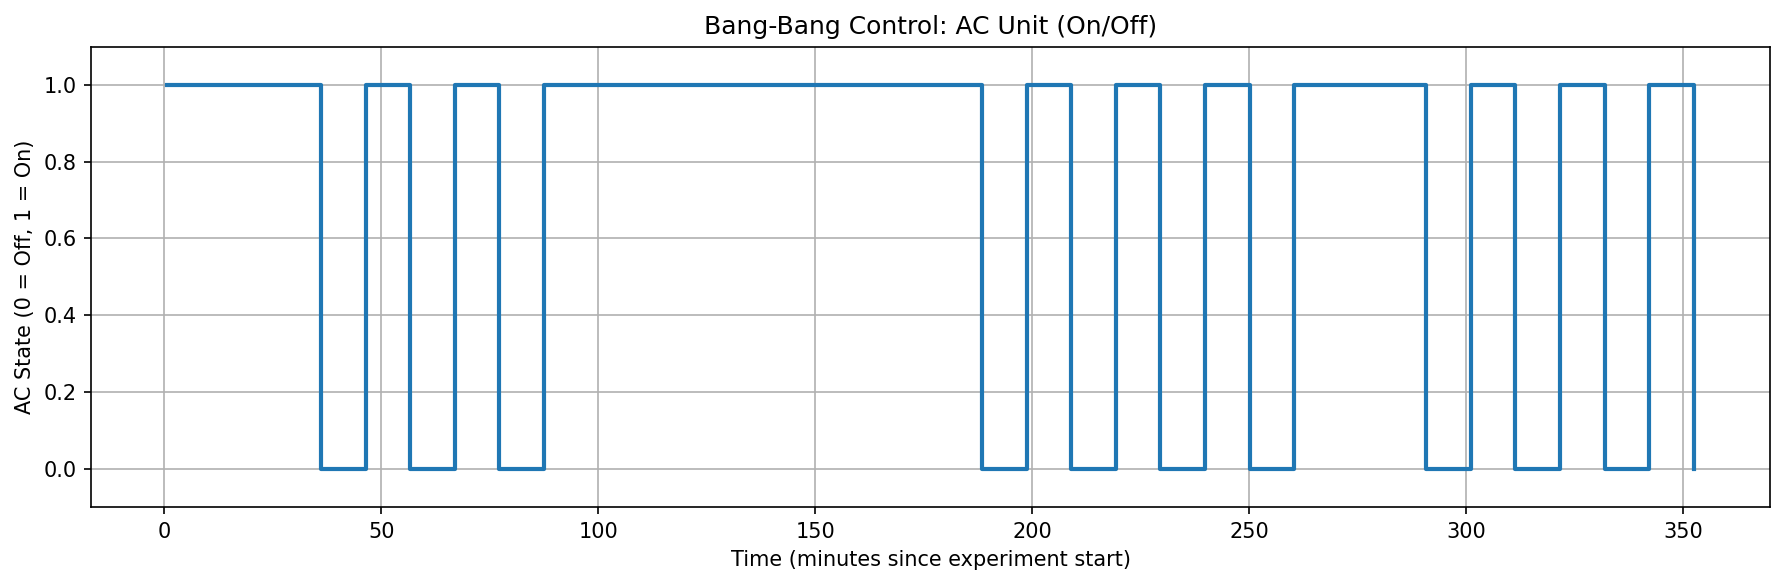

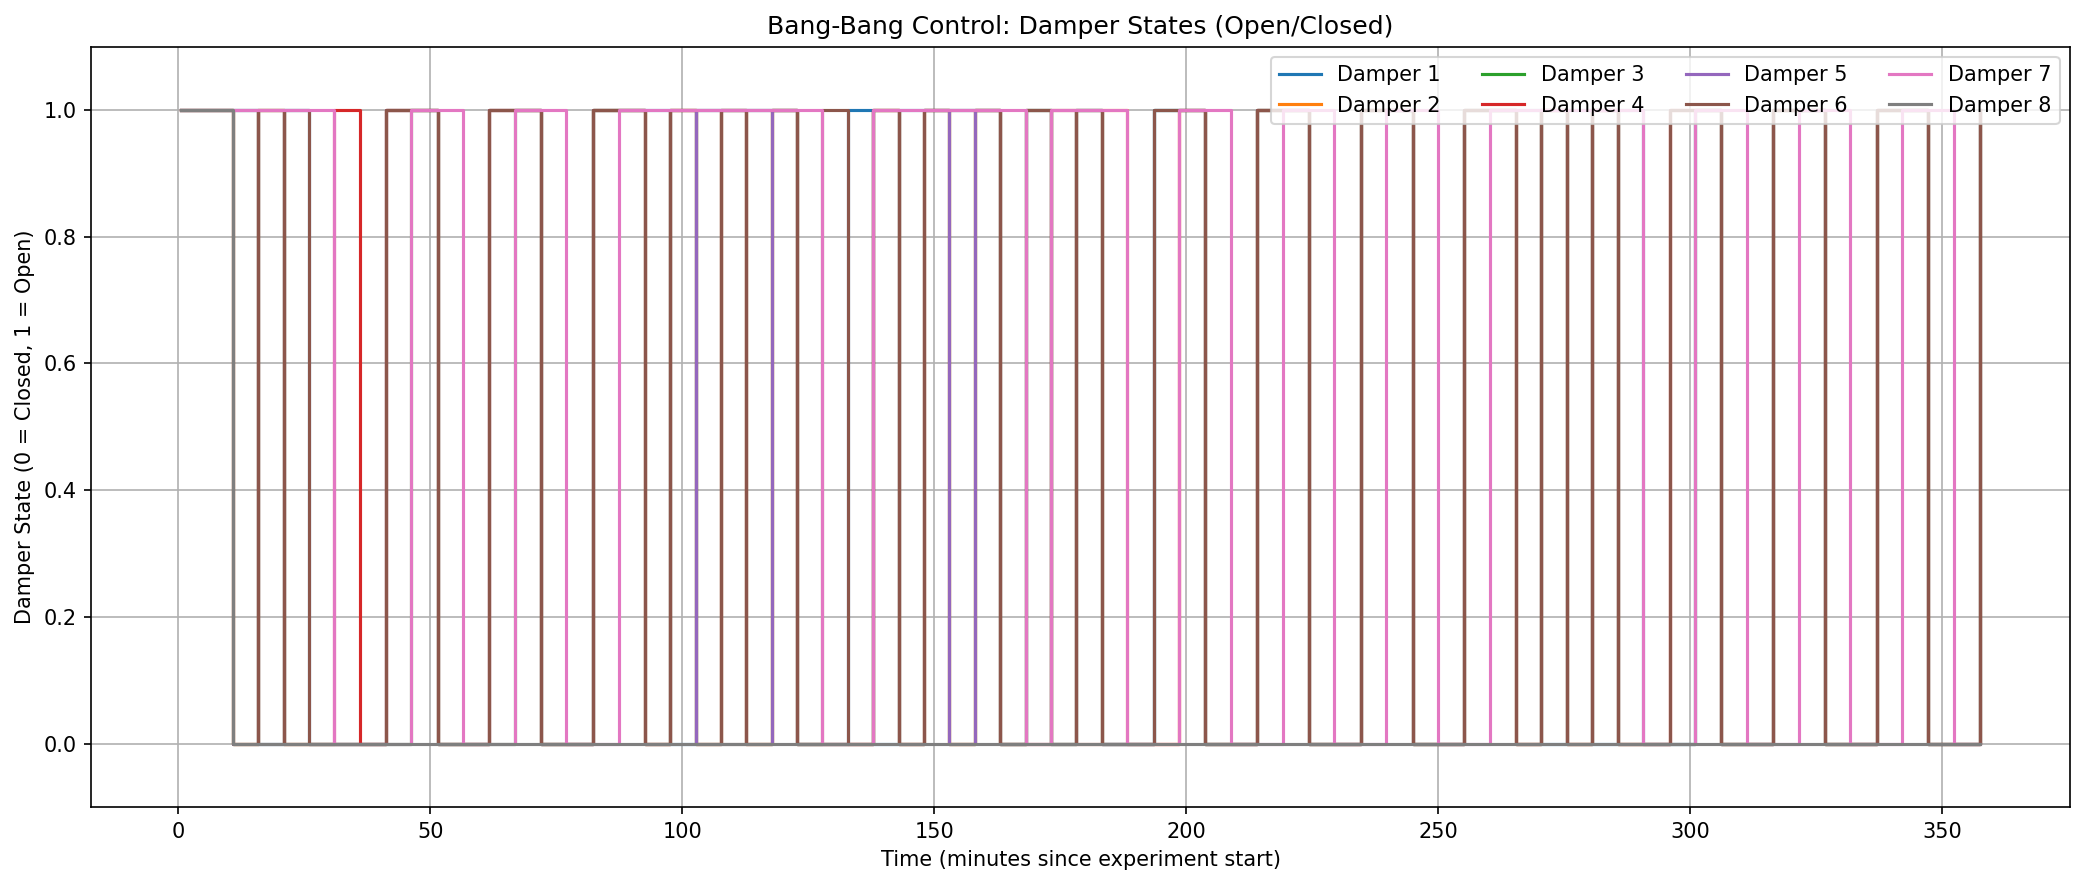

In [38]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# ---------------- CONFIG ----------------
base_folder = r"D:\data_04_15_2025\data\bang_bang\control_actions"
experiment_start = pd.to_datetime("2025-04-15 14:45:00")
experiment_end = pd.to_datetime("2025-04-15 20:45:00")
# ----------------------------------------

# -------- Load AC Control Data ----------
ac_records = []

for file in os.listdir(base_folder):
    if file.startswith('ac_2025-04-15') and file.endswith('.json'):
        path = os.path.join(base_folder, file)
        with open(path, 'r') as f:
            try:
                data = json.load(f)
                if 'timestamp' in data and 'action' in data:
                    ac_records.append({
                        'timestamp': data['timestamp'],
                        'ac_state': 1 if data['action'].lower() == 'on' else 0
                    })
            except json.JSONDecodeError:
                print(f"Failed to decode {file}")

ac_df = pd.DataFrame(ac_records)
ac_df['timestamp'] = pd.to_datetime(ac_df['timestamp'], format='%Y-%m-%d_%H-%M-%S')
ac_df.set_index('timestamp', inplace=True)
ac_df.sort_index(inplace=True)
ac_df['minutes_since_start'] = (ac_df.index - experiment_start).total_seconds() / 60

# -------- Load Damper Data --------------
damper_records = []

for file in os.listdir(base_folder):
    if file.startswith('dampers_2025-04-15') and file.endswith('.json'):
        path = os.path.join(base_folder, file)
        with open(path, 'r') as f:
            try:
                data = json.load(f)
                if 'timestamp' in data and 'damper_positions' in data:
                    # Convert damper positions to binary (1 = open, 0 = closed)
                    damper_entry = {
                        f'Damper_{i+1}': 1 if pos != 0 else 0
                        for i, pos in enumerate(data['damper_positions'])
                    }
                    damper_entry['timestamp'] = data['timestamp']
                    damper_records.append(damper_entry)
            except json.JSONDecodeError:
                print(f"Failed to decode {file}")

damper_df = pd.DataFrame(damper_records)
damper_df['timestamp'] = pd.to_datetime(damper_df['timestamp'], format='%Y-%m-%d_%H-%M-%S')
damper_df.set_index('timestamp', inplace=True)
damper_df.sort_index(inplace=True)
damper_df['minutes_since_start'] = (damper_df.index - experiment_start).total_seconds() / 60

# -------- Plot AC Binary State ----------
plt.figure(figsize=(12, 4), dpi=150)
plt.step(ac_df['minutes_since_start'], ac_df['ac_state'], where='post', label='AC State', linewidth=2)
plt.title("Bang-Bang Control: AC Unit (On/Off)")
plt.xlabel("Time (minutes since experiment start)")
plt.ylabel("AC State (0 = Off, 1 = On)")
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.tight_layout()
plt.show()

# -------- Plot Binary Damper States -----
plt.figure(figsize=(14, 6), dpi=150)
for i in range(1, 9):
    plt.step(damper_df['minutes_since_start'], damper_df[f'Damper_{i}'], where='post', label=f'Damper {i}')

plt.title("Bang-Bang Control: Damper States (Open/Closed)")
plt.xlabel("Time (minutes since experiment start)")
plt.ylabel("Damper State (0 = Closed, 1 = Open)")
plt.ylim(-0.1, 1.1)
plt.legend(loc='upper right', ncol=4)
plt.grid(True)
plt.tight_layout()
plt.show()


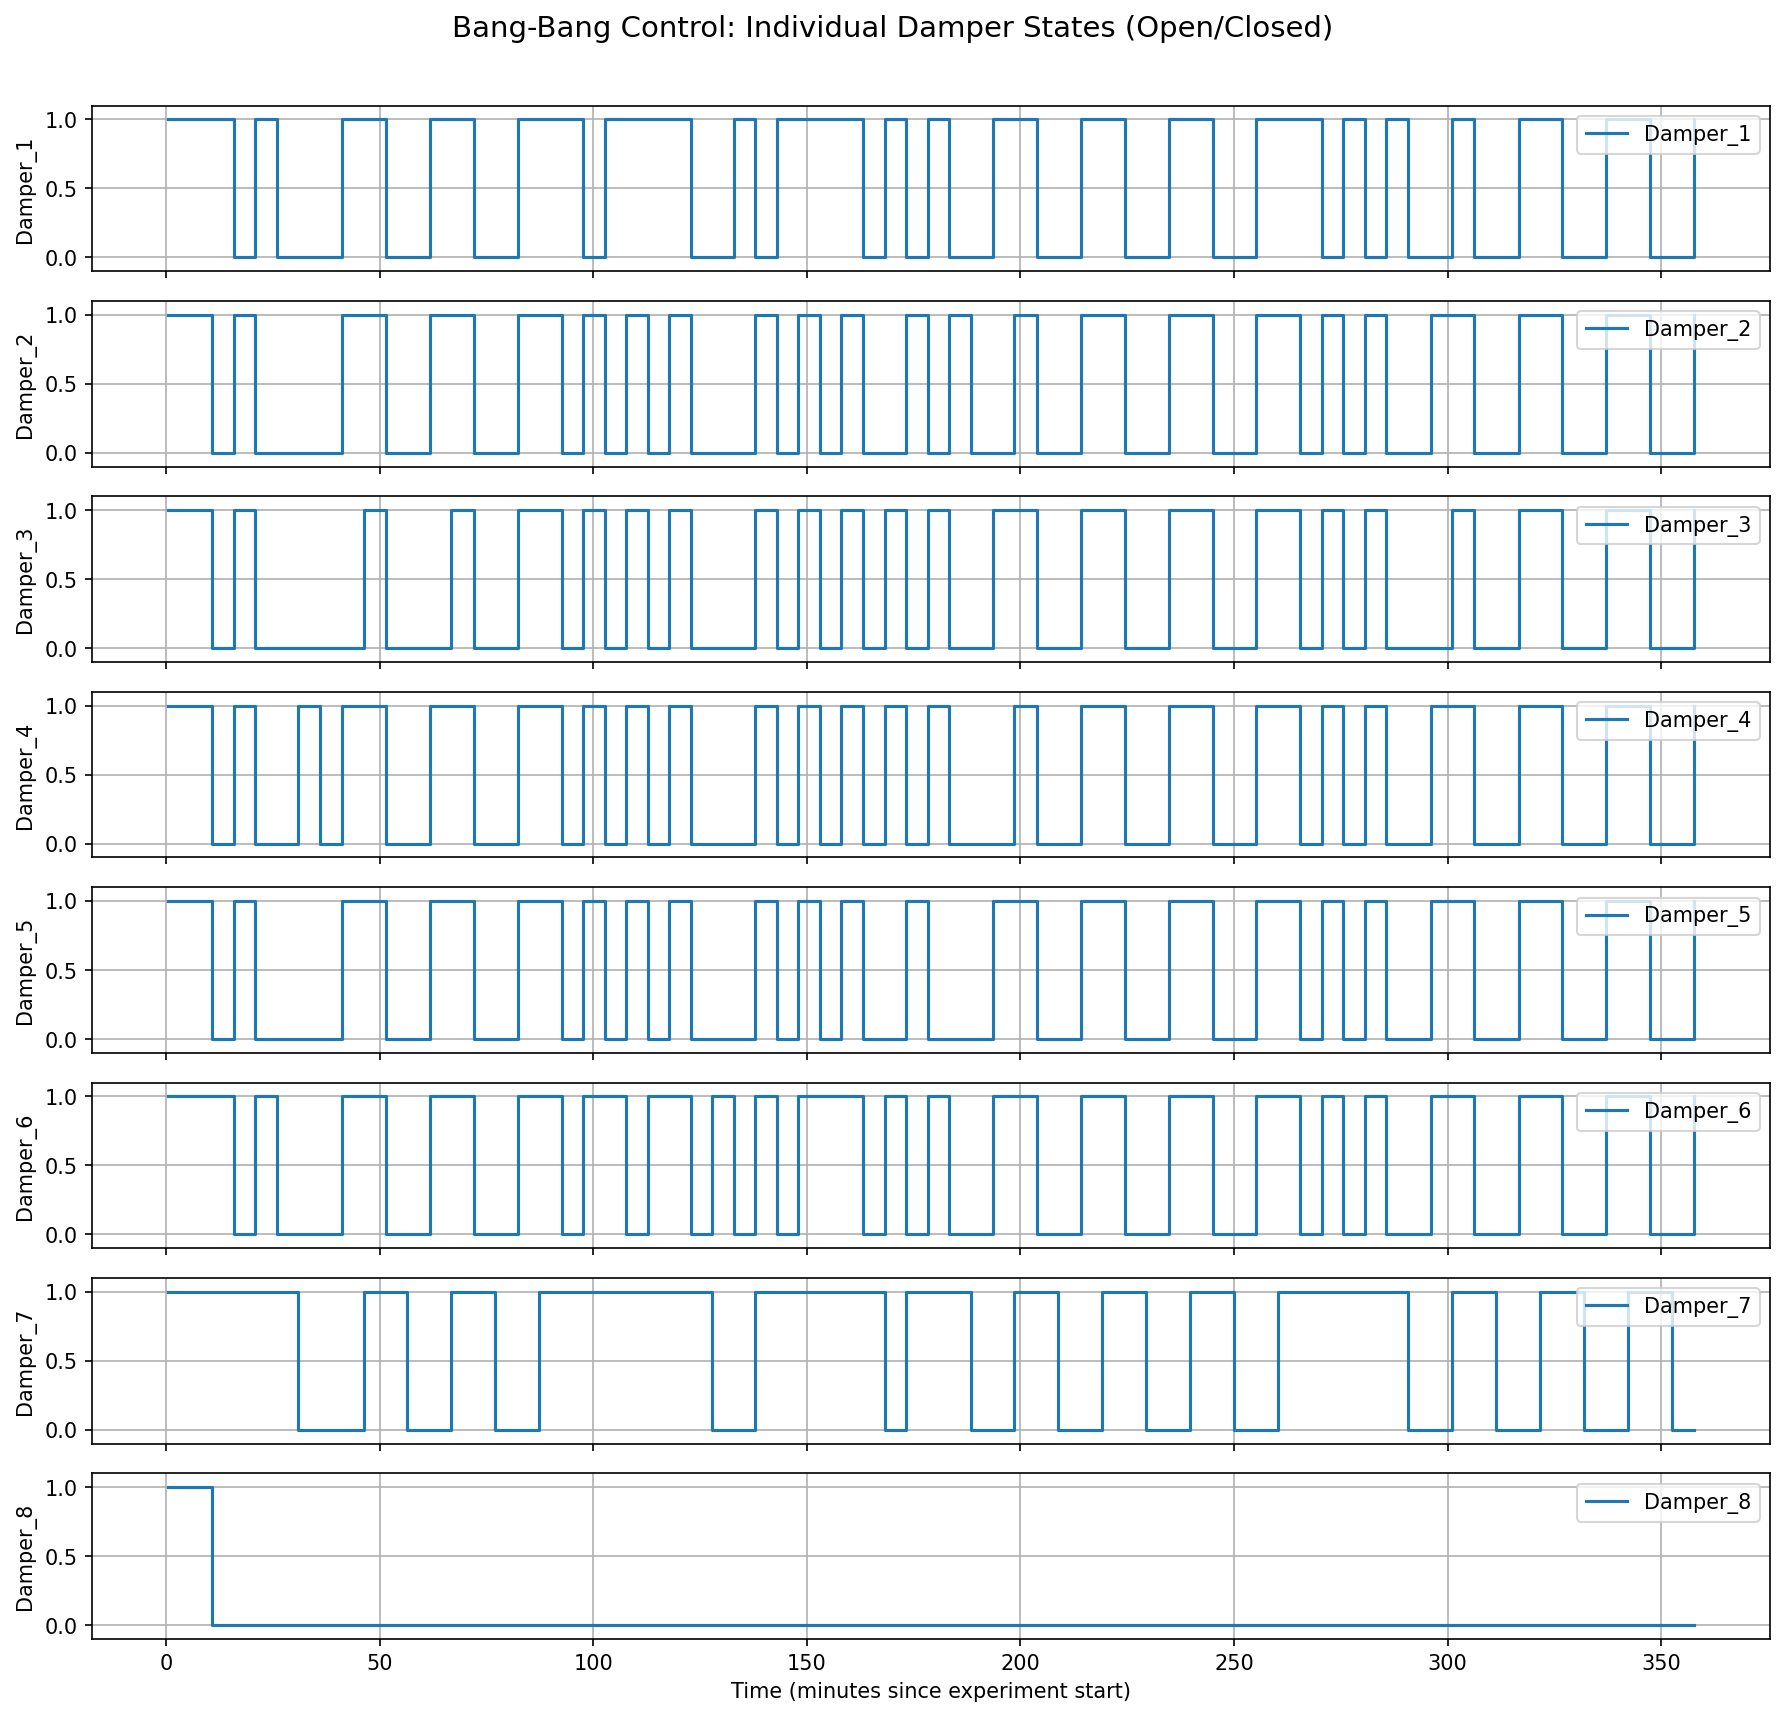

In [39]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# ---------------- CONFIG ----------------
base_folder = r"D:\data_04_15_2025\data\bang_bang\control_actions"
experiment_start = pd.to_datetime("2025-04-15 14:45:00")
# ----------------------------------------

# -------- Load Damper Data --------------
damper_records = []

for file in os.listdir(base_folder):
    if file.startswith('dampers_2025-04-15') and file.endswith('.json'):
        path = os.path.join(base_folder, file)
        with open(path, 'r') as f:
            try:
                data = json.load(f)
                if 'timestamp' in data and 'damper_positions' in data:
                    # Convert damper positions to binary (1 = open, 0 = closed)
                    damper_entry = {
                        f'Damper_{i+1}': 1 if pos != 0 else 0
                        for i, pos in enumerate(data['damper_positions'])
                    }
                    damper_entry['timestamp'] = data['timestamp']
                    damper_records.append(damper_entry)
            except json.JSONDecodeError:
                print(f"Failed to decode {file}")

damper_df = pd.DataFrame(damper_records)
damper_df['timestamp'] = pd.to_datetime(damper_df['timestamp'], format='%Y-%m-%d_%H-%M-%S')
damper_df.set_index('timestamp', inplace=True)
damper_df.sort_index(inplace=True)
damper_df['minutes_since_start'] = (damper_df.index - experiment_start).total_seconds() / 60

# -------- Plot Each Damper in a Separate Subplot --------
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(12, 12), dpi=150, sharex=True)

for i in range(8):
    damper_name = f'Damper_{i+1}'
    axes[i].step(damper_df['minutes_since_start'], damper_df[damper_name], where='post', label=damper_name)
    axes[i].set_ylim(-0.1, 1.1)
    axes[i].set_ylabel(f'{damper_name}')
    axes[i].grid(True)
    axes[i].legend(loc='upper right')

axes[-1].set_xlabel("Time (minutes since experiment start)")
fig.suptitle("Bang-Bang Control: Individual Damper States (Open/Closed)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


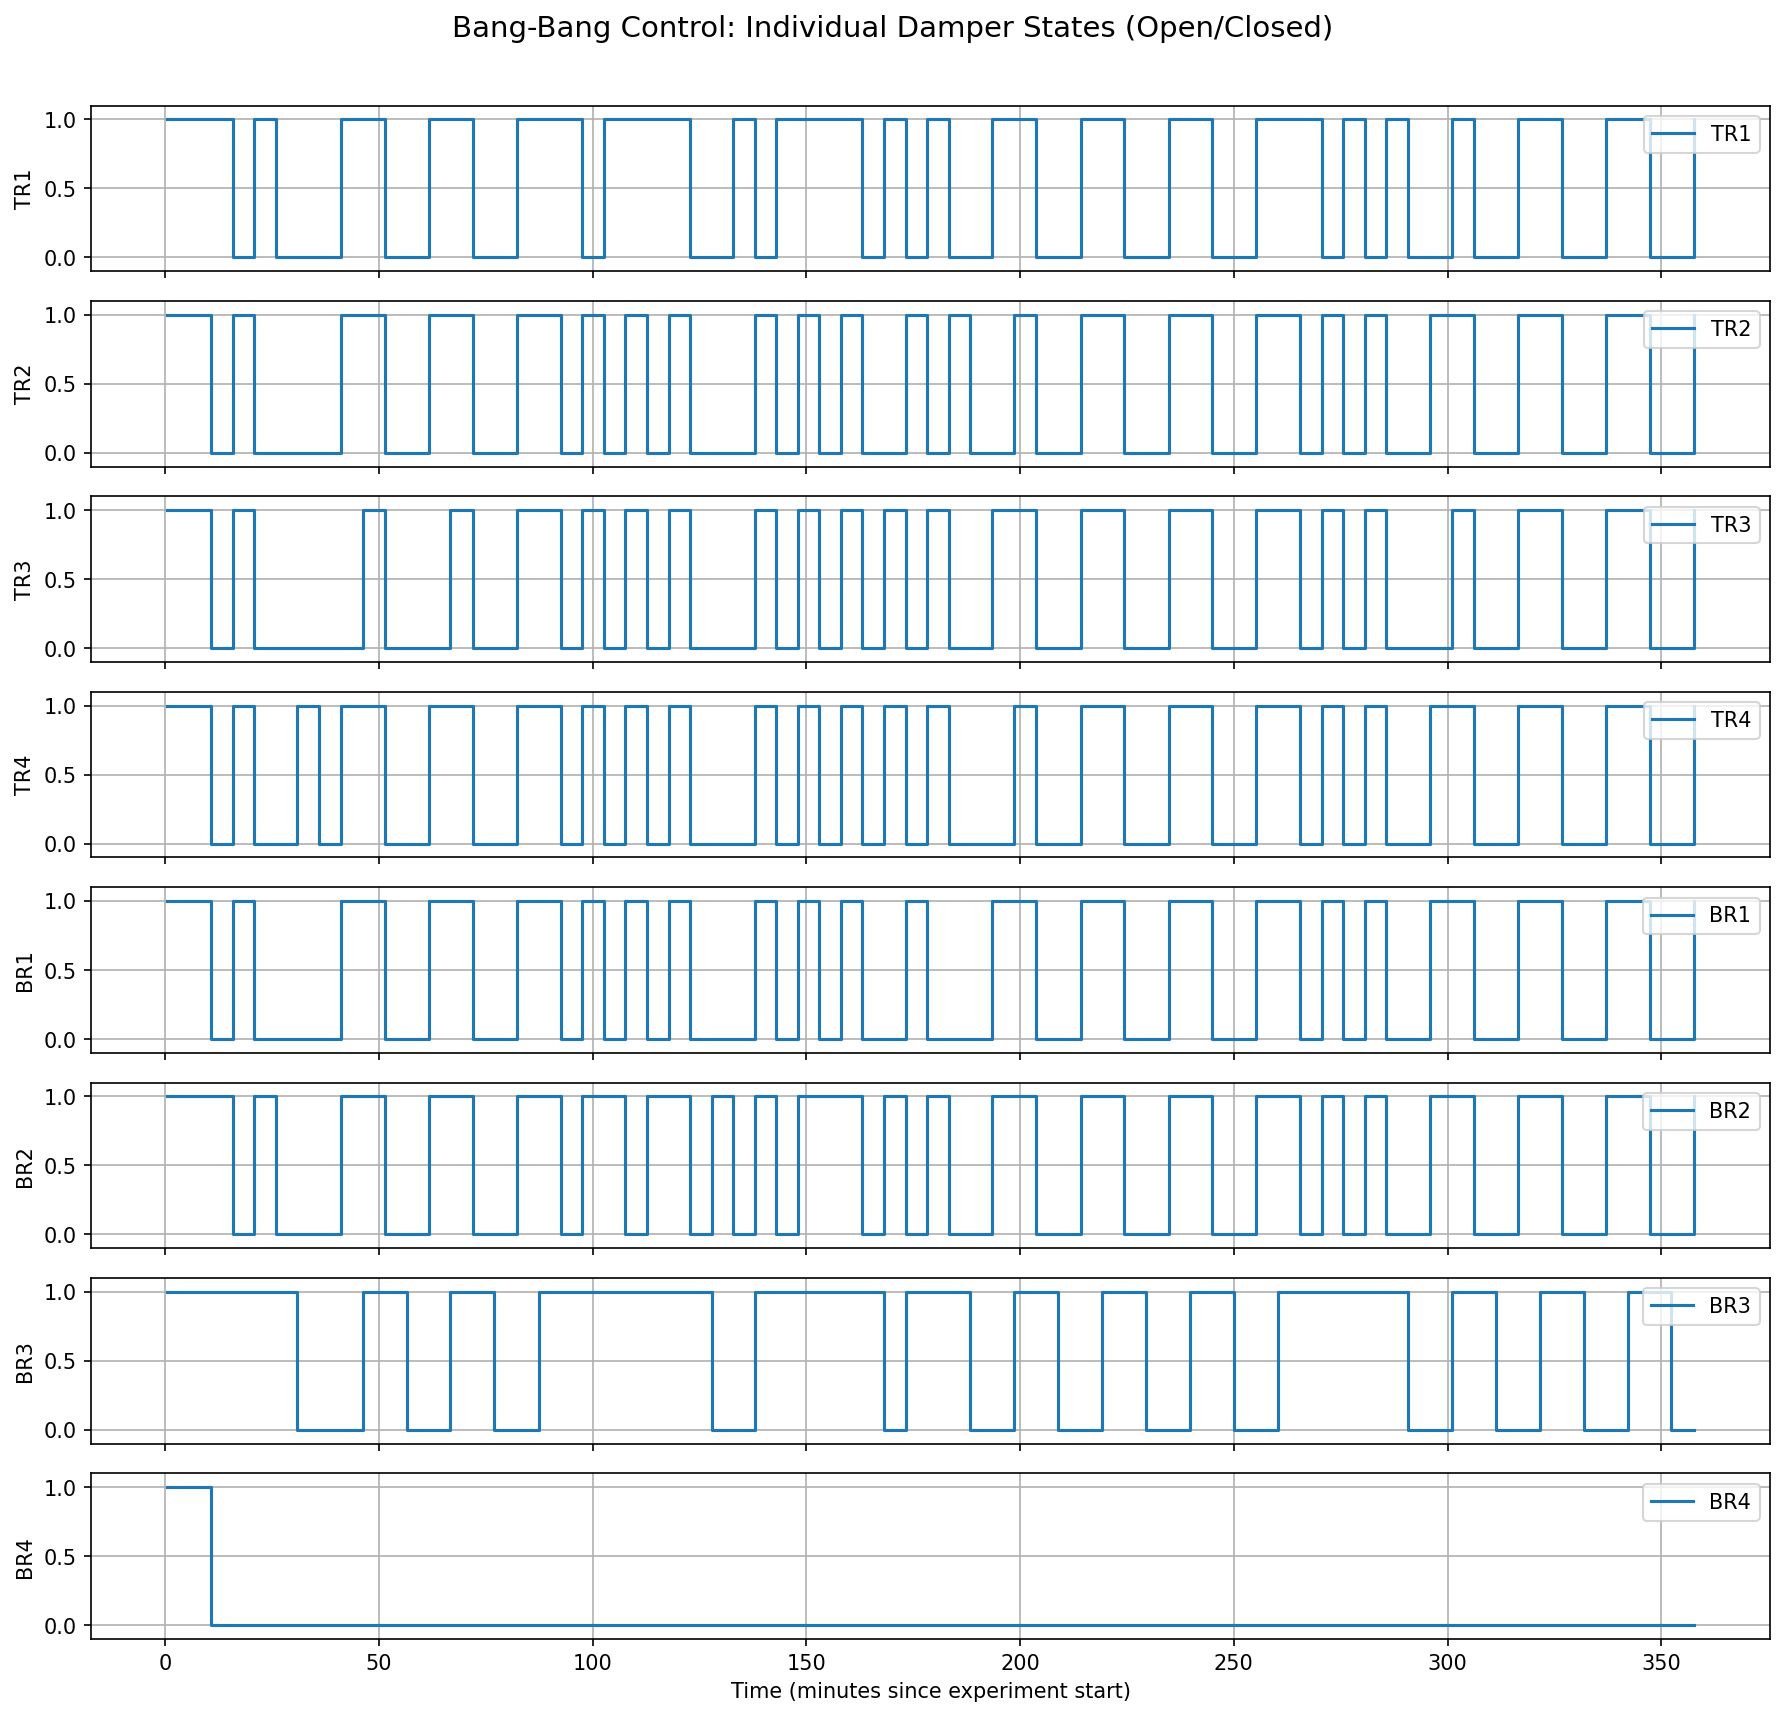

In [41]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# ---------- CONFIG ----------
base_folder = r"D:\data_04_15_2025\data\bang_bang\control_actions"
experiment_start = pd.to_datetime("2025-04-15 14:45:00")
# ----------------------------

# Room mapping based on damper index
room_map = {
    1: "TR1", 2: "TR2", 3: "TR3", 4: "TR4",
    5: "BR1", 6: "BR2", 7: "BR3", 8: "BR4"
}

# -------- Load Damper Data ----------
damper_records = []

for file in os.listdir(base_folder):
    if file.startswith('dampers_2025-04-15') and file.endswith('.json'):
        file_path = os.path.join(base_folder, file)
        with open(file_path, 'r') as f:
            try:
                data = json.load(f)
                if 'timestamp' in data and 'damper_positions' in data:
                    binary_dampers = {
                        f'Damper_{i+1}': 1 if pos != 0 else 0
                        for i, pos in enumerate(data['damper_positions'])
                    }
                    binary_dampers['timestamp'] = data['timestamp']
                    damper_records.append(binary_dampers)
            except json.JSONDecodeError:
                print(f"Error decoding {file}")

# -------- Convert to DataFrame ----------
damper_df = pd.DataFrame(damper_records)
damper_df['timestamp'] = pd.to_datetime(damper_df['timestamp'], format='%Y-%m-%d_%H-%M-%S')
damper_df.set_index('timestamp', inplace=True)
damper_df.sort_index(inplace=True)

# Calculate time in minutes since experiment start
damper_df['minutes_since_start'] = (damper_df.index - experiment_start).total_seconds() / 60

# -------- Plot Each Damper in a Subplot ----------
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(12, 12), dpi=150, sharex=True)

for i in range(1, 9):
    damper_col = f'Damper_{i}'
    room_label = room_map[i]
    axes[i-1].step(damper_df['minutes_since_start'], damper_df[damper_col], where='post', label=room_label)
    axes[i-1].set_ylim(-0.1, 1.1)
    axes[i-1].set_ylabel(room_label)
    axes[i-1].grid(True)
    axes[i-1].legend(loc='upper right')

axes[-1].set_xlabel("Time (minutes since experiment start)")
fig.suptitle("Bang-Bang Control: Individual Damper States (Open/Closed)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


In [42]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# ---------- CONFIG ----------
temp_folder = r"D:\03_06_2025\data\bang_bang\temperatures"
damper_folder = r"D:\data_04_15_2025\data\bang_bang\control_actions"
experiment_start = pd.to_datetime("2025-04-15 14:45:00")
# ----------------------------

# ---------- Load BR1 Temperature ----------
temp_records = []

for file in os.listdir(temp_folder):
    if file.startswith("temps_2025-04-15") and file.endswith(".json"):
        with open(os.path.join(temp_folder, file), 'r') as f:
            data = json.load(f)
            if 'temperatures' in data and 'timestamp' in data:
                row = data['temperatures']
                row['timestamp'] = data['timestamp']
                temp_records.append(row)

temp_df = pd.DataFrame(temp_records)
temp_df['timestamp'] = pd.to_datetime(temp_df['timestamp'], format="%Y-%m-%d_%H-%M-%S")
temp_df.set_index('timestamp', inplace=True)
temp_df.sort_index(inplace=True)
temp_df = temp_df.loc[experiment_start:]
temp_df['minutes_since_start'] = (temp_df.index - experiment_start).total_seconds() / 60

# ---------- Load Damper 5 State ----------
damper_records = []

for file in os.listdir(damper_folder):
    if file.startswith("dampers_2025-04-15") and file.endswith(".json"):
        with open(os.path.join(damper_folder, file), 'r') as f:
            data = json.load(f)
            if 'damper_positions' in data and 'timestamp' in data:
                # Damper 5 is index 4 (0-based indexing)
                damper_value = 1 if data['damper_positions'][4] != 0 else 0
                damper_records.append({
                    'timestamp': data['timestamp'],
                    'damper_5': damper_value
                })

damper_df = pd.DataFrame(damper_records)
damper_df['timestamp'] = pd.to_datetime(damper_df['timestamp'], format="%Y-%m-%d_%H-%M-%S")
damper_df.set_index('timestamp', inplace=True)
damper_df.sort_index(inplace=True)
damper_df = damper_df.loc[experiment_start:]
damper_df['minutes_since_start'] = (damper_df.index - experiment_start).total_seconds() / 60

# ---------- Merge and Plot ----------
plt.figure(figsize=(14, 6), dpi=150)

# Plot BR1 temperature
plt.plot(temp_df['minutes_since_start'], temp_df['BR1'], label='BR1 Temperature (°F)', color='tab:blue')
plt.axhspan(70, 80, color='green', alpha=0.1, label='Comfort Zone (70–80°F)')
plt.ylabel("Temperature (°F)", color='tab:blue')
plt.xlabel("Time (minutes since experiment start)")
plt.grid(True)

# Plot damper state on secondary y-axis
ax2 = plt.gca().twinx()
ax2.step(damper_df['minutes_since_start'], damper_df['damper_5'], where='post',
         label='Damper 5 State (0 = Closed, 1 = Open)', color='tab:red', linestyle='--')
ax2.set_ylabel("Damper 5 State", color='tab:red')
ax2.set_ylim(-0.1, 1.1)

# Legends
plt.title("BR1 Temperature vs Damper 5 State")
plt.tight_layout()
plt.show()


KeyError: 'timestamp'

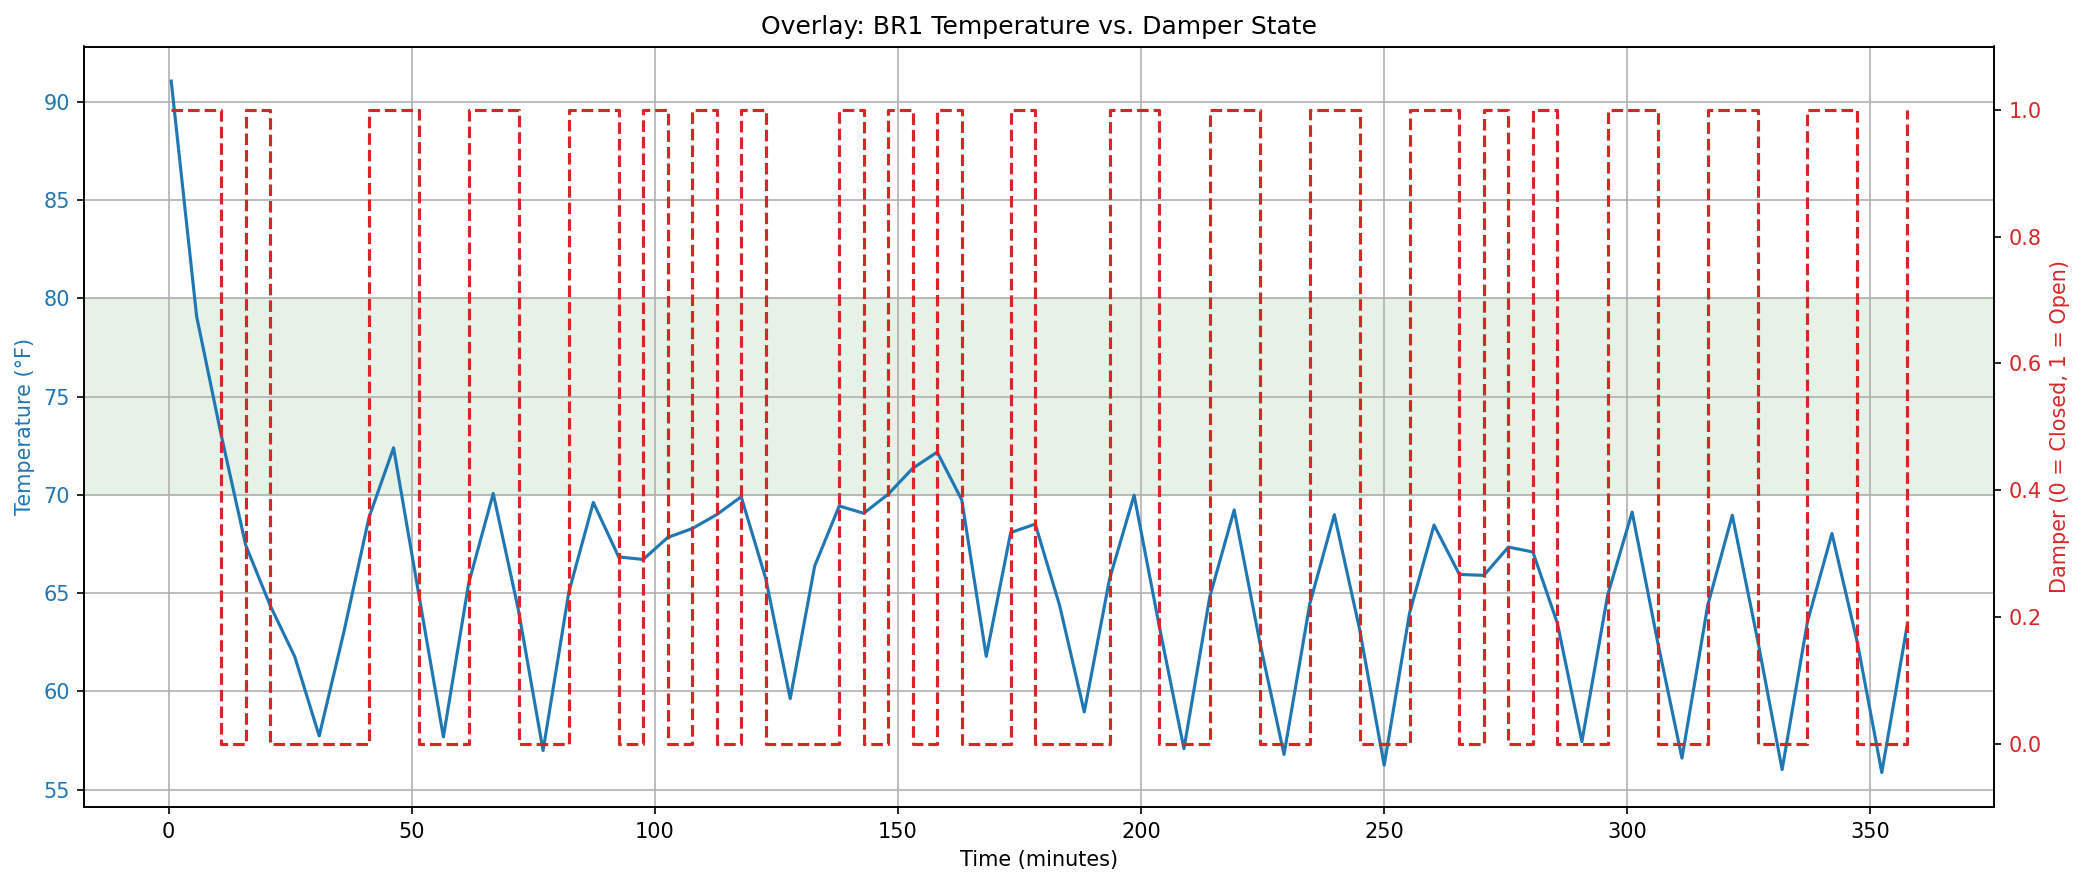

In [58]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# ---------- CONFIG ----------
temp_folder = r"D:\data_04_15_2025\data\bang_bang\temperatures"
damper_folder = r"D:\data_04_15_2025\data\bang_bang\control_actions"
experiment_start = pd.to_datetime("2025-04-15 14:45:00")
experiment_end = pd.to_datetime("2025-04-15 20:45:00")
# ----------------------------

# ---------- Load BR1 Temperature ----------
temp_records = []

for filename in os.listdir(temp_folder):
    if filename.startswith('temps_2025-04-15') and filename.endswith('.json'):
        file_path = os.path.join(temp_folder, filename)
        with open(file_path, 'r') as file:
            try:
                data = json.load(file)
                if 'temperatures' in data and 'timestamp' in data:
                    row = data['temperatures'].copy()
                    row['timestamp'] = data['timestamp']
                    temp_records.append(row)
            except json.JSONDecodeError:
                print(f"Could not decode {filename}")

temp_df = pd.DataFrame(temp_records)
temp_df['timestamp'] = pd.to_datetime(temp_df['timestamp'], format='%Y-%m-%d_%H-%M-%S')
temp_df.set_index('timestamp', inplace=True)
temp_df.sort_index(inplace=True)
temp_df = temp_df.loc[experiment_start:experiment_end]
temp_df['minutes_since_start'] = (temp_df.index - experiment_start).total_seconds() / 60

# ---------- Load Damper 5 Data ----------
damper_records = []

for file in os.listdir(damper_folder):
    if file.startswith('dampers_2025-04-15') and file.endswith('.json'):
        file_path = os.path.join(damper_folder, file)
        with open(file_path, 'r') as f:
            try:
                data = json.load(f)
                if 'timestamp' in data and 'damper_positions' in data:
                    damper_state = 1 if data['damper_positions'][4] != 0 else 0  # Damper 5 is index 4
                    damper_records.append({
                        'timestamp': data['timestamp'],
                        'damper_5': damper_state
                    })
            except json.JSONDecodeError:
                print(f"Could not decode {file}")

damper_df = pd.DataFrame(damper_records)
damper_df['timestamp'] = pd.to_datetime(damper_df['timestamp'], format='%Y-%m-%d_%H-%M-%S')
damper_df.set_index('timestamp', inplace=True)
damper_df.sort_index(inplace=True)
damper_df = damper_df.loc[experiment_start:experiment_end]
damper_df['minutes_since_start'] = (damper_df.index - experiment_start).total_seconds() / 60

# ---------- Plot BR1 Temp + Damper 5 ----------
fig, ax1 = plt.subplots(figsize=(14, 6), dpi=150)

# BR1 temperature plot
ax1.plot(temp_df['minutes_since_start'], temp_df['BR1'], label='BR1 Temperature (°F)', color='tab:blue')
ax1.axhspan(70, 80, color='green', alpha=0.1, label='Comfort Range')
ax1.set_xlabel("Time (minutes)")
ax1.set_ylabel("Temperature (°F)", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

# Damper state plot (right y-axis)
ax2 = ax1.twinx()
ax2.step(damper_df['minutes_since_start'], damper_df['damper_5'], where='post',
         label='Damper State (Open/Closed)', color='tab:red', linestyle='--')
ax2.set_ylabel("Damper (0 = Closed, 1 = Open)", color='tab:red')
ax2.set_ylim(-0.1, 1.1)
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title & Layout
plt.title("Overlay: BR1 Temperature vs. Damper State")
fig.tight_layout()
plt.show()


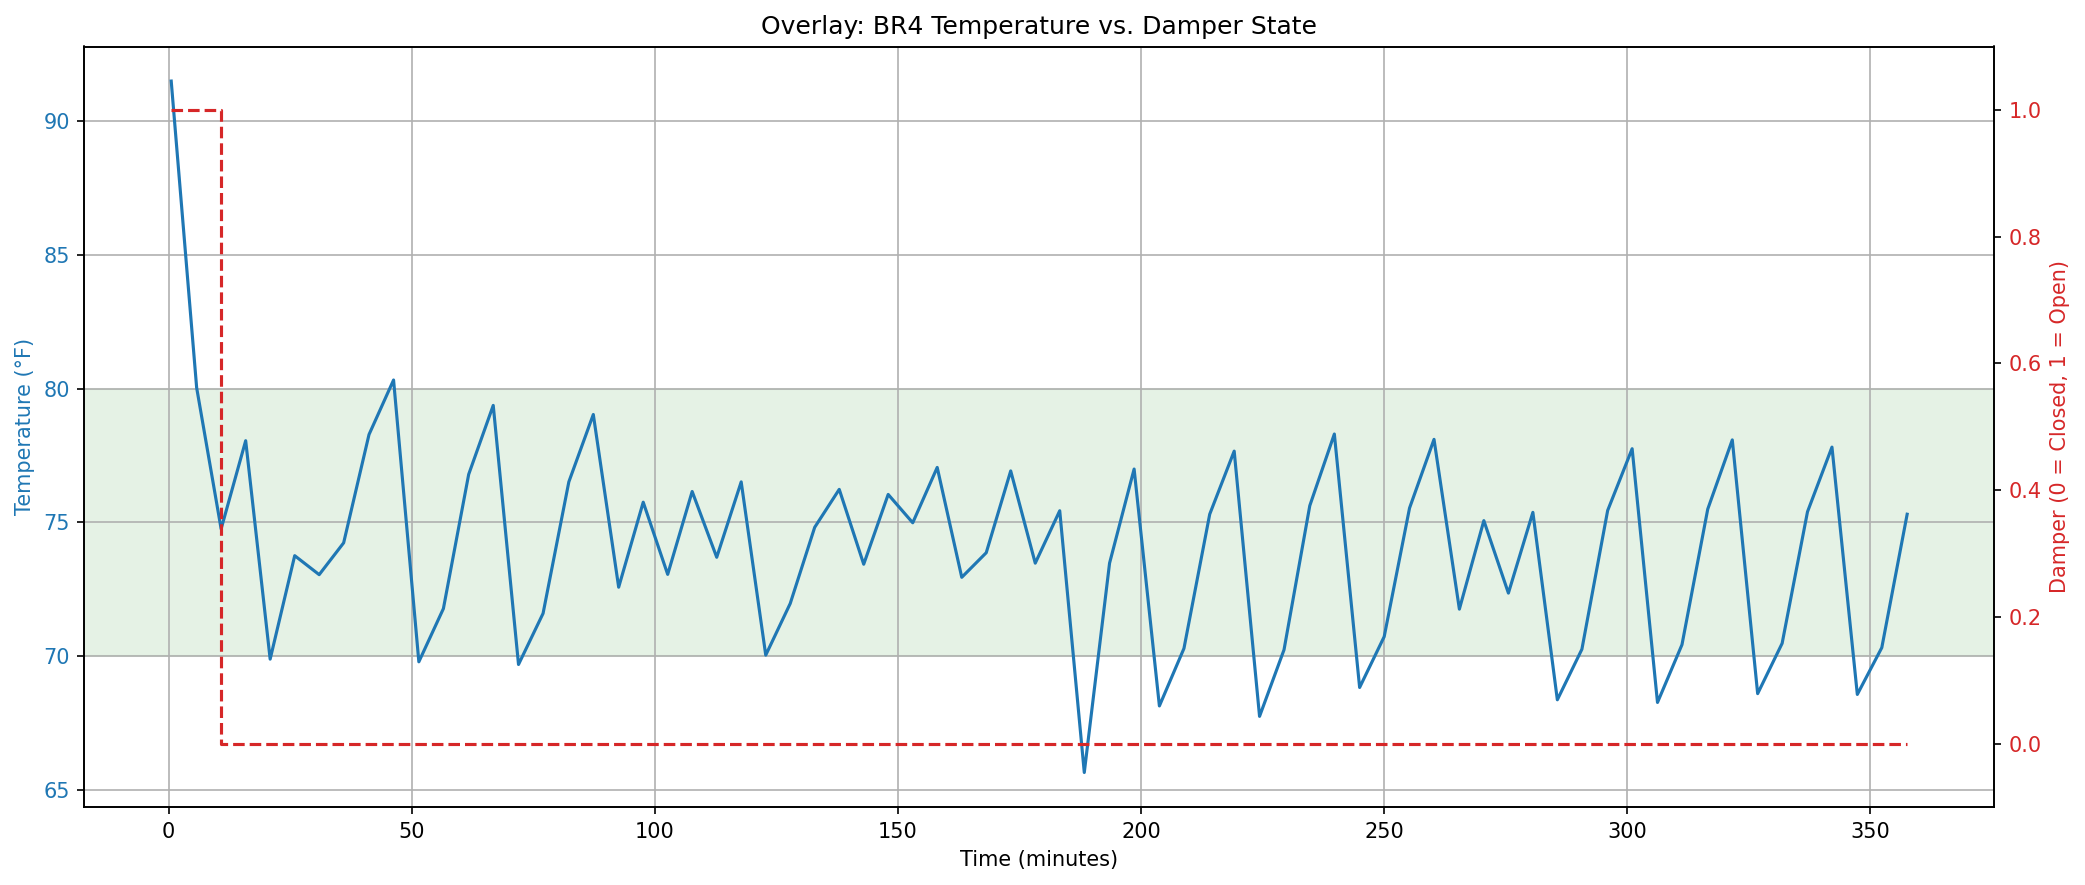

In [59]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# ---------- CONFIG ----------
temp_folder = r"D:\data_04_15_2025\data\bang_bang\temperatures"
damper_folder = r"D:\data_04_15_2025\data\bang_bang\control_actions"
experiment_start = pd.to_datetime("2025-04-15 14:45:00")
experiment_end = pd.to_datetime("2025-04-15 20:45:00")
# ----------------------------

# ---------- Load BR4 Temperature ----------
temp_records = []

for filename in os.listdir(temp_folder):
    if filename.startswith('temps_2025-04-15') and filename.endswith('.json'):
        file_path = os.path.join(temp_folder, filename)
        with open(file_path, 'r') as file:
            try:
                data = json.load(file)
                if 'temperatures' in data and 'timestamp' in data:
                    row = data['temperatures'].copy()
                    row['timestamp'] = data['timestamp']
                    temp_records.append(row)
            except json.JSONDecodeError:
                print(f"Could not decode {filename}")

temp_df = pd.DataFrame(temp_records)
temp_df['timestamp'] = pd.to_datetime(temp_df['timestamp'], format='%Y-%m-%d_%H-%M-%S')
temp_df.set_index('timestamp', inplace=True)
temp_df.sort_index(inplace=True)
temp_df = temp_df.loc[experiment_start:experiment_end]
temp_df['minutes_since_start'] = (temp_df.index - experiment_start).total_seconds() / 60

# ---------- Load Damper 8 Data ----------
damper_records = []

for file in os.listdir(damper_folder):
    if file.startswith('dampers_2025-04-15') and file.endswith('.json'):
        file_path = os.path.join(damper_folder, file)
        with open(file_path, 'r') as f:
            try:
                data = json.load(f)
                if 'timestamp' in data and 'damper_positions' in data:
                    damper_state = 1 if data['damper_positions'][7] != 0 else 0  # Damper 8 is index 7
                    damper_records.append({
                        'timestamp': data['timestamp'],
                        'damper_8': damper_state
                    })
            except json.JSONDecodeError:
                print(f"Could not decode {file}")

damper_df = pd.DataFrame(damper_records)
damper_df['timestamp'] = pd.to_datetime(damper_df['timestamp'], format='%Y-%m-%d_%H-%M-%S')
damper_df.set_index('timestamp', inplace=True)
damper_df.sort_index(inplace=True)
damper_df = damper_df.loc[experiment_start:experiment_end]
damper_df['minutes_since_start'] = (damper_df.index - experiment_start).total_seconds() / 60

# ---------- Plot BR4 Temp + Damper 8 ----------
fig, ax1 = plt.subplots(figsize=(14, 6), dpi=150)

# BR4 temperature plot
ax1.plot(temp_df['minutes_since_start'], temp_df['BR4'], label='BR4 Temperature (°F)', color='tab:blue')
ax1.axhspan(70, 80, color='green', alpha=0.1, label='Comfort Range')
ax1.set_xlabel("Time (minutes)")
ax1.set_ylabel("Temperature (°F)", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

# Damper state plot (right y-axis)
ax2 = ax1.twinx()
ax2.step(damper_df['minutes_since_start'], damper_df['damper_8'], where='post',
         label='Damper State (Open/Closed)', color='tab:red', linestyle='--')
ax2.set_ylabel("Damper (0 = Closed, 1 = Open)", color='tab:red')
ax2.set_ylim(-0.1, 1.1)
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title & Layout
plt.title("Overlay: BR4 Temperature vs. Damper State")
fig.tight_layout()
plt.show()


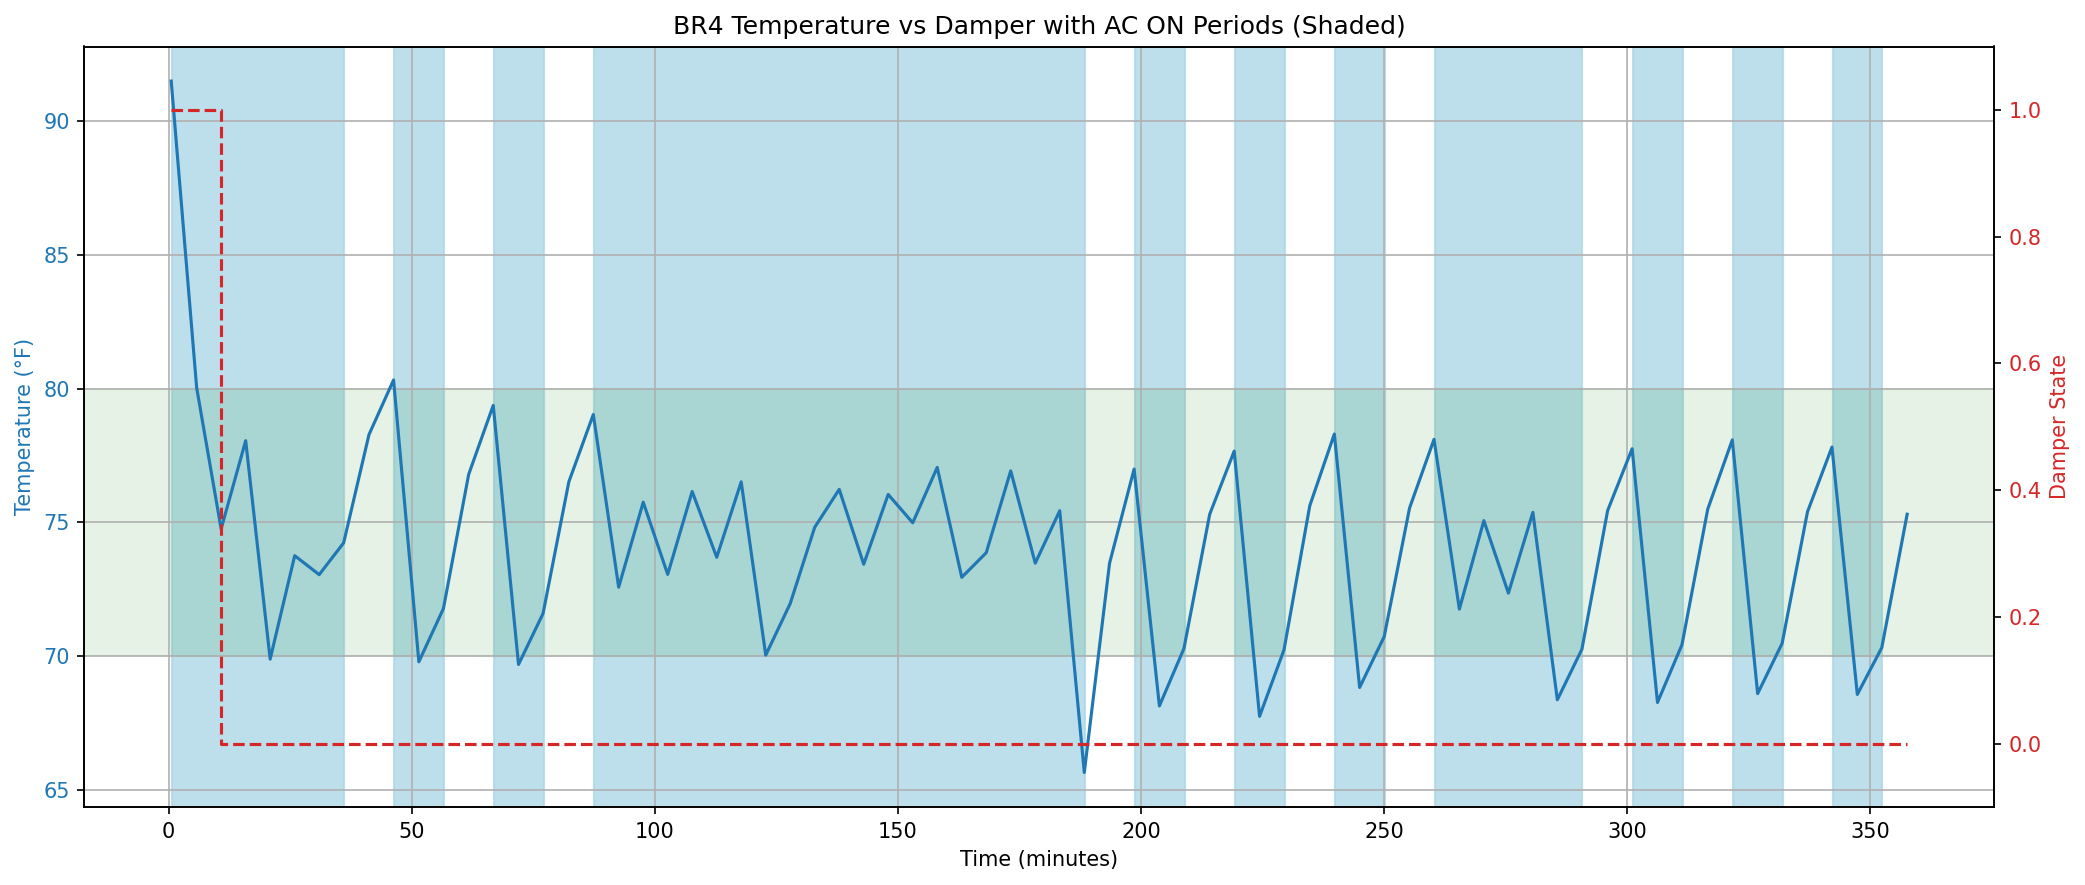

In [60]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# ---------- CONFIG ----------
temp_folder = r"D:\data_04_15_2025\data\bang_bang\temperatures"
damper_folder = r"D:\data_04_15_2025\data\bang_bang\control_actions"
ac_folder = r"D:\data_04_15_2025\data\bang_bang\control_actions"
experiment_start = pd.to_datetime("2025-04-15 14:45:00")
experiment_end = pd.to_datetime("2025-04-15 20:45:00")
# ----------------------------

# ---------- Load BR4 Temperature ----------
temp_records = []
for filename in os.listdir(temp_folder):
    if filename.startswith('temps_2025-04-15') and filename.endswith('.json'):
        with open(os.path.join(temp_folder, filename), 'r') as file:
            data = json.load(file)
            if 'temperatures' in data and 'timestamp' in data:
                row = data['temperatures'].copy()
                row['timestamp'] = data['timestamp']
                temp_records.append(row)

temp_df = pd.DataFrame(temp_records)
temp_df['timestamp'] = pd.to_datetime(temp_df['timestamp'], format='%Y-%m-%d_%H-%M-%S')
temp_df.set_index('timestamp', inplace=True)
temp_df.sort_index(inplace=True)
temp_df = temp_df.loc[experiment_start:experiment_end]
temp_df['minutes_since_start'] = (temp_df.index - experiment_start).total_seconds() / 60

# ---------- Load Damper 8 Data ----------
damper_records = []
for file in os.listdir(damper_folder):
    if file.startswith('dampers_2025-04-15') and file.endswith('.json'):
        with open(os.path.join(damper_folder, file), 'r') as f:
            data = json.load(f)
            if 'timestamp' in data and 'damper_positions' in data:
                damper_state = 1 if data['damper_positions'][7] != 0 else 0  # Damper 8 = index 7
                damper_records.append({
                    'timestamp': data['timestamp'],
                    'damper_8': damper_state
                })

damper_df = pd.DataFrame(damper_records)
damper_df['timestamp'] = pd.to_datetime(damper_df['timestamp'], format='%Y-%m-%d_%H-%M-%S')
damper_df.set_index('timestamp', inplace=True)
damper_df.sort_index(inplace=True)
damper_df = damper_df.loc[experiment_start:experiment_end]
damper_df['minutes_since_start'] = (damper_df.index - experiment_start).total_seconds() / 60

# ---------- Load AC State Data ----------
ac_records = []
for file in os.listdir(ac_folder):
    if file.startswith('ac_2025-04-15') and file.endswith('.json'):
        with open(os.path.join(ac_folder, file), 'r') as f:
            data = json.load(f)
            if 'timestamp' in data and 'action' in data:
                ac_records.append({
                    'timestamp': data['timestamp'],
                    'ac_state': 1 if data['action'].lower() == 'on' else 0
                })

ac_df = pd.DataFrame(ac_records)
ac_df['timestamp'] = pd.to_datetime(ac_df['timestamp'], format='%Y-%m-%d_%H-%M-%S')
ac_df.sort_values('timestamp', inplace=True)
ac_df['minutes_since_start'] = (ac_df['timestamp'] - experiment_start).dt.total_seconds() / 60

# ---------- Generate ON-period bands ----------
ac_on_periods = []
for i in range(len(ac_df) - 1):
    if ac_df.iloc[i]['ac_state'] == 1:
        start = ac_df.iloc[i]['minutes_since_start']
        end = ac_df.iloc[i + 1]['minutes_since_start']
        ac_on_periods.append((start, end))

# ---------- Plot Everything ----------
fig, ax1 = plt.subplots(figsize=(14, 6), dpi=150)

# Shade AC ON regions
for start, end in ac_on_periods:
    ax1.axvspan(start, end, color='lightblue', alpha=0.8)

# BR4 temperature plot
ax1.plot(temp_df['minutes_since_start'], temp_df['BR4'], label='BR4 Temperature (°F)', color='tab:blue')
ax1.axhspan(70, 80, color='green', alpha=0.1, label='Comfort Range')
ax1.set_xlabel("Time (minutes)")
ax1.set_ylabel("Temperature (°F)", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

# Damper 8 state on right axis
ax2 = ax1.twinx()
ax2.step(damper_df['minutes_since_start'], damper_df['damper_8'], where='post',
         label='Damper (Open/Closed)', color='tab:red', linestyle='--')
ax2.set_ylabel("Damper State", color='tab:red')
ax2.set_ylim(-0.1, 1.1)
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and legend
plt.title("BR4 Temperature vs Damper with AC ON Periods (Shaded)")
fig.tight_layout()
plt.show()
